# READ THIS PLEASE: NOTE THAT FOR EACH SECTION (i. e. 8 MeV or Combined), YOU MUST RELOAD THE CELL THAT DEFINES CAT1, CAT2... CAT10 

In [1]:
%pip install uproot3

  Using cached uproot3-3.14.1-py3-none-any.whl (117 kB)
  Using cached uproot3_methods-0.10.0-py3-none-any.whl (32 kB)
  Using cached awkward0-0.15.1-py3-none-any.whl (87 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import uproot3 as ur
file11 = ur.open("http://moller.physics.berkeley.edu/~yury/Phys129/tree_TYPE_DATA_2011.root")
file12 = ur.open("http://moller.physics.berkeley.edu/~yury/Phys129/tree_TYPE_DATA_2012.root")
print(file11.keys())
print(file12.keys())
tree11 = file11["TYPE_DATA"]
tree12 = file12["tree_TYPE_DATA"]
print(tree11.keys())
print(tree12.keys())

[b'TYPE_DATA;1']
[b'tree_TYPE_DATA;1']
[b'RunNumber', b'EventNumber', b'lbn', b'JetMultiplicity', b'averageIntPerXing', b'PV_n', b'vtx_z', b'invariant_mass', b'ph_pt_leading', b'ph_pt_subleading', b'ph_eta_corrected_leading', b'ph_eta_corrected_subleading', b'ph_etas2_leading', b'ph_etas2_subleading', b'ph_phi_leading', b'ph_phi_subleading', b'ph_E_corrected_leading', b'ph_E_corrected_subleading', b'ph_isConv_leading', b'ph_isConv_subleading', b'categ_Model5Categories', b'categ_Model10Categories', b'categ_ModelHighPttEtaConvVBF', b'categ_ModelHighPttGoodBadVBF', b'categ_conversion']
[b'RunNumber', b'EventNumber', b'invariant_mass', b'vtx_z', b'ph_pt_leading', b'ph_pt_subleading', b'ph_eta_corrected_leading', b'ph_eta_corrected_subleading', b'ph_etas1_leading', b'ph_etas1_subleading', b'ph_etas2_leading', b'ph_etas2_subleading', b'ph_cl_eta_leading', b'ph_cl_eta_subleading', b'ph_eta_leading', b'ph_eta_subleading', b'ph_cl_phi_leading', b'ph_cl_phi_subleading', b'ph_phi_leading', b'ph_p

# 8 MeV Code

In [49]:
import matplotlib.pyplot as plt
import numpy as np

#df = tree.pandas.df(["invariant_mass","ph*","categ*"])
df12 = tree12.pandas.df()
df12

,RunNumber,EventNumber,invariant_mass,vtx_z,ph_pt_leading,ph_pt_subleading,ph_eta_corrected_leading,ph_eta_corrected_subleading,ph_etas1_leading,ph_etas1_subleading,...,MET_RefFinal_et,categ_conv_eta,categ_conv_eta_ptt,categ_Model5Categories,categ_Model10Categories,categ_ModelHighPttEtaConvVBF,categ_ModelHighPttGoodBadVBF,categ_conversion,categ_multiplicity_jets,categ_pTt
entry,,,,,,,,,,,,,,,,,,,,,
0,200842,25404000,114.236508,8.078268,55578.660156,48877.449219,-0.117814,-0.964799,-0.112664,-0.961281,...,33410.125000,4,7,3,7,4,2,4,0,0.0
1,200863,2063048,150.575453,-1.139064,65689.929688,59797.113281,-1.580192,-0.288792,-1.580468,-0.289495,...,36932.039062,2,3,3,3,2,2,1,0,0.0
2,200863,2205667,111.802937,47.500282,50850.523438,43179.027344,0.861278,-0.375784,0.883356,-0.347123,...,5274.125488,4,7,3,7,4,2,4,0,0.0
3,200863,3903104,111.692742,12.596541,49765.097656,39888.367188,0.217582,1.531587,0.225479,1.534620,...,12444.061523,5,9,3,9,5,2,4,0,0.0
4,200863,4510879,108.769898,-26.890108,61681.742188,47536.179688,-1.312175,-1.282866,-1.321007,-1.291918,...,7775.618164,5,9,3,9,5,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35246,205113,42198958,136.420766,14.884994,49885.582031,38773.031250,1.757288,-0.341219,1.760996,-0.332164,...,15779.859375,4,7,3,7,4,2,4,0,0.0
35247,205113,42603013,136.439156,-10.336266,61627.238281,55950.621094,-0.176050,-1.300083,-0.182582,-1.303520,...,35418.656250,5,9,3,9,5,2,3,0,0.0
35248,205113,42683792,105.423867,73.684433,52627.847656,42401.777344,1.748418,0.825979,1.766914,0.860916,...,28770.265625,4,7,3,7,4,2,5,0,0.0


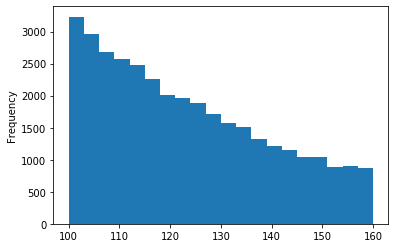

In [50]:
plt.yscale('linear')
df12["invariant_mass"].plot.hist(bins=20)

In [32]:
cat1 = df12.loc[df12['categ_Model10Categories'] == 1, 'invariant_mass']
cat2 = df12.loc[df12['categ_Model10Categories'] == 2, 'invariant_mass']
cat3 = df12.loc[df12['categ_Model10Categories'] == 3, 'invariant_mass']
cat4 = df12.loc[df12['categ_Model10Categories'] == 4, 'invariant_mass']
cat5 = df12.loc[df12['categ_Model10Categories'] == 5, 'invariant_mass']
cat6 = df12.loc[df12['categ_Model10Categories'] == 6, 'invariant_mass']
cat7 = df12.loc[df12['categ_Model10Categories'] == 7, 'invariant_mass']
cat8 = df12.loc[df12['categ_Model10Categories'] == 8, 'invariant_mass']
cat9 = df12.loc[df12['categ_Model10Categories'] == 9, 'invariant_mass']
cat10 = df12.loc[df12['categ_Model10Categories'] == 10, 'invariant_mass']

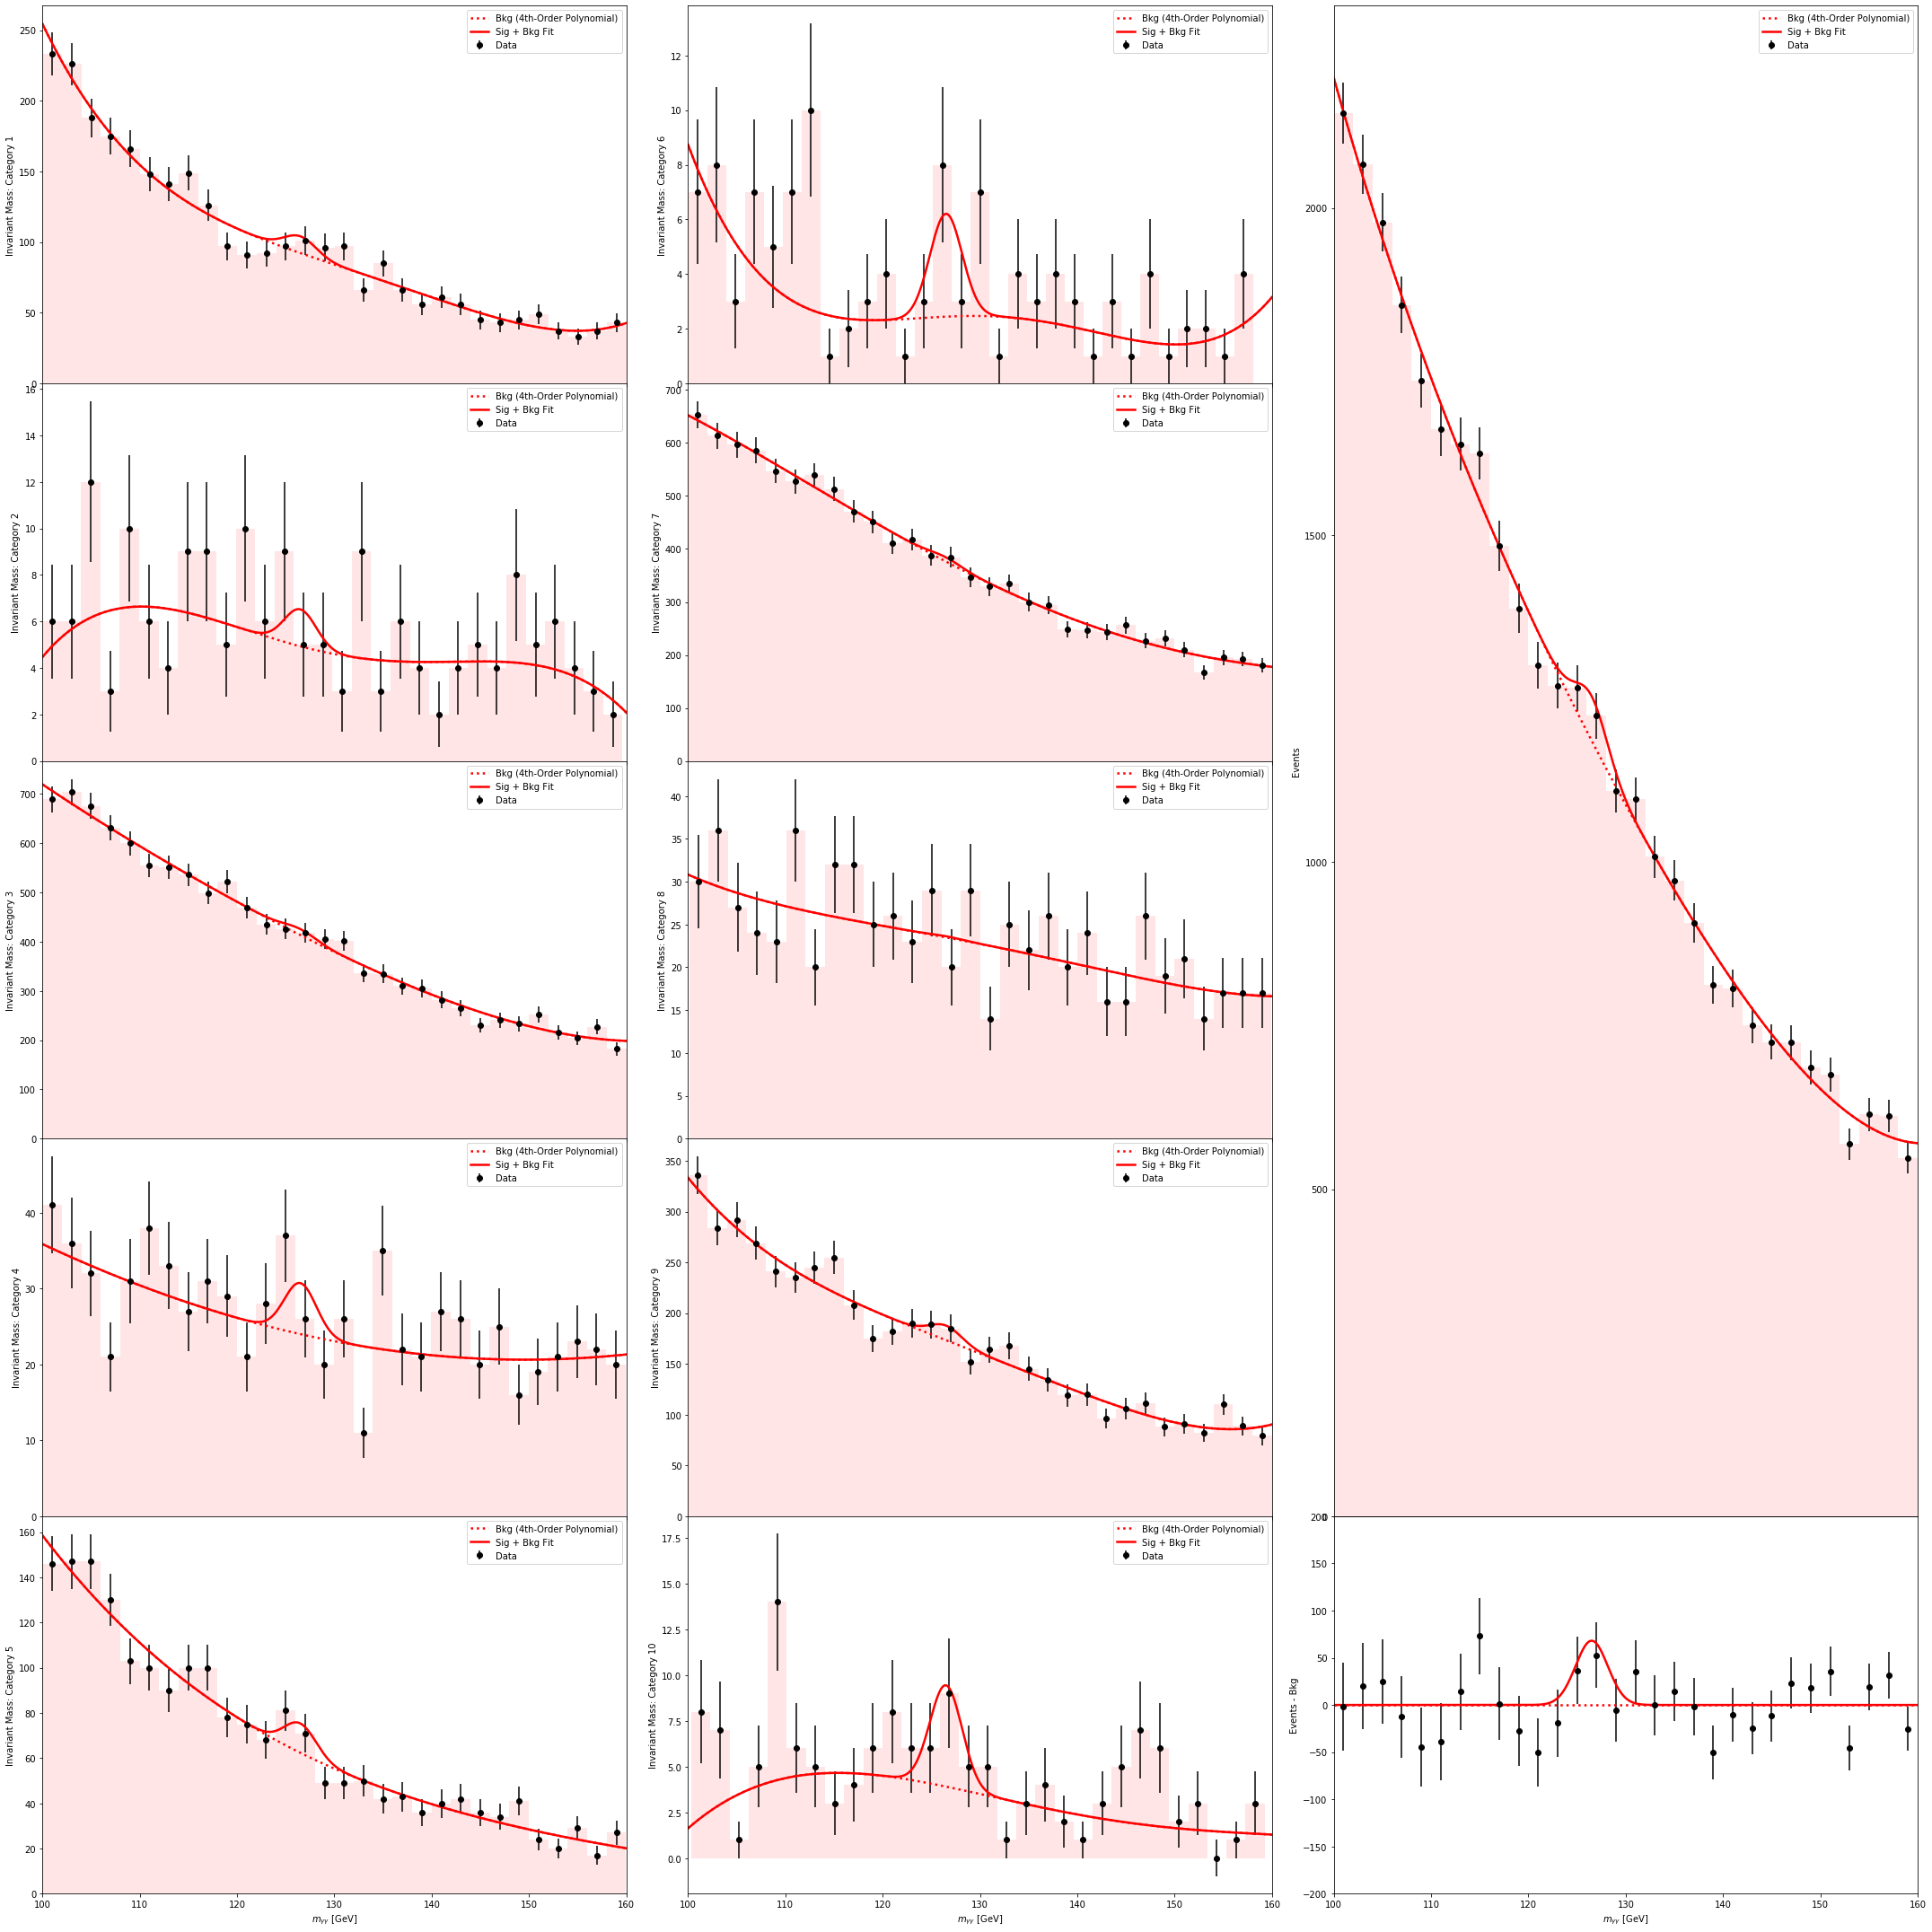

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.optimize import curve_fit

# FWHM = 2*sqrt(2*ln(2)) * sigma
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df12["invariant_mass"]

def model(m, a0, b1, b2, b3, b4):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4)

def modelN(m, a0, b1, b2, b3, b4, A):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4) + A*(np.exp(-0.5*((m-mu)/sigmaTot)**2)/(sigmaTot*np.sqrt(2*np.pi)))

# a0 is the number of events in the histogram at m = 130
# a0*b1 is the rough slope of the graph
# b1, b2, b3, b4 should be fairly small

# Plotting
fig, ax = plt.subplots(5, 3, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

ax[0, 2].remove()
ax[1, 2].remove()
ax[2, 2].remove()
ax[3, 2].remove()

gs = ax[0, 2].get_gridspec()
axesBig = fig.add_subplot(gs[0:4, 2])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)

#err1 = np.sqrt(n1)
#err2 = np.sqrt(n2)
#err3 = np.sqrt(n3)
#err4 = np.sqrt(n4)
#err5 = np.sqrt(n5)
#err6 = np.sqrt(n6)
#err7 = np.sqrt(n7)
#err8 = np.sqrt(n8)
#err9 = np.sqrt(n8)
#err10 = np.sqrt(n10)
#errTot = np.sqrt(nTot)


# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, valTot = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i], nTot[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10, errorTot = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10), np.sqrt(valTot)
    if val1 == 0: error1 = 1
    if val2 == 0: error2 = 1
    if val3 == 0: error3 = 1
    if val4 == 0: error4 = 1
    if val5 == 0: error5 = 1
    if val6 == 0: error6 = 1
    if val7 == 0: error7 = 1
    if val8 == 0: error8 = 1
    if val9 == 0: error9 = 1
    if val10 == 0: error10 = 1
    if valTot == 0: errorTot = 1
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i], errTot[i] = error6, error7, error8, error9, error10, errorTot

axesBig.set_ylabel('Events')
ax[4, 2].set_ylabel('Events - Bkg')
ax[4, 2].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])
xTot = 0.5*(binTot[1:] + binTot[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[84.0737856, -2.72951300e-02, 5.10297359e-05, -1.63271389e-05, 8.91174399e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[4.59581679, -1.72830616e-02, 1.04515112e-03, 9.58704023e-06, -1.51719756e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[379.190512, -2.50978568e-02, 1.91937752e-04, 2.43127384e-06, 4.63981395e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[23.0563749, -1.07078021e-02, 2.68365970e-04, 2.10302997e-07, -1.88203898e-09], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[55.3727820, -3.38217254e-02, 6.24001387e-04, -8.72288635e-06, 6.41864496e-08], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[2.46596841, -1.96367874e-03, -1.54991684e-03, -3.97283932e-05, 3.46558322e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[343.656501, -2.61147388e-02, 2.78538626e-04, 3.43866835e-06, -5.35034607e-08], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[22.7303718, -9.81763075e-03, -7.37279739e-05, -6.69502266e-07, 1.35621408e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[160.285893, -2.33655372e-02, -1.37395190e-05, -2.11881789e-06, 4.12610887e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[3.50944176, -3.36469068e-02, -1.19464318e-04, 3.55806292e-05, -5.87180670e-07], sigma=err10)
optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[1.08763987e+03, -2.49992665e-02, 2.08249692e-04, 4.08935753e-08, 1.05872337e-07], sigma=errTot)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = [84.0737856, -2.72951300e-02, 5.10297359e-05, -1.63271389e-05, 8.91174399e-07, 49.2593761]
args2 = [4.59581679, -1.72830616e-02, 1.04515112e-03, 9.58704023e-06, -1.51719756e-06, 6.59279034]
args3 = [379.190512, -2.50978568e-02, 1.91937752e-04, 2.43127384e-06, 4.63981395e-08, 50.7190570]
args4 = [23.0563749, -1.07078021e-02, 2.68365970e-04, 2.10302997e-07, -1.88203898e-09, 27.9101523]
args5 = [55.3727820, -3.38217254e-02, 6.24001387e-04, -8.72288635e-06, 6.41864496e-08, 53.9321493]
args6 = [2.46596841, -1.96367874e-03, -1.54991684e-03, -3.97283932e-05, 3.46558322e-06, 15.6230131]
args7 = [343.656501, -2.61147388e-02, 2.78538626e-04, 3.43866835e-06, -5.35034607e-08, 33.0581354]
args8 = [22.7303718, -9.81763075e-03, -7.37279739e-05, -6.69502266e-07, 1.35621408e-07, 0.575727520]
args9 = [160.285893, -2.33655372e-02, -1.37395190e-05, -2.11881789e-06, 4.12610887e-07, 59.7037357]
args10 = [3.50944176, -3.36469068e-02, -1.19464318e-04, 3.55806292e-05, -5.87180670e-07, 22.9576568]
argsTot = [1.08763987e+03, -2.49992665e-02, 2.08249692e-04, 4.08935753e-08, 1.05872337e-07, 282.512044]

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)
#optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, sigma=err1)
#optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, sigma=err2)
#optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, sigma=err3)
#optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, sigma=err4)
#optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, sigma=err5)
#optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, sigma=err6)
#optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, sigma=err7)
#optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, sigma=err8)
#optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, sigma=err9)
#optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, sigma=err10)
#optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, sigma=errTot)

#ax[0, 0].plot(massRng, modelN(massRng, *optN1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 0].plot(massRng, modelN(massRng, *optN2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 0].plot(massRng, modelN(massRng, *optN3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 0].plot(massRng, modelN(massRng, *optN4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 0].plot(massRng, modelN(massRng, *optN5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[0, 1].plot(massRng, modelN(massRng, *optN6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 1].plot(massRng, modelN(massRng, *optN7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 1].plot(massRng, modelN(massRng, *optN8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 1].plot(massRng, modelN(massRng, *optN9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 1].plot(massRng, modelN(massRng, *optN10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 2].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 2].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[4, 2].set_xlim(100, 160)
ax[4, 2].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[4, 2].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
axesBig.legend()
fig.tight_layout()

plt.show()

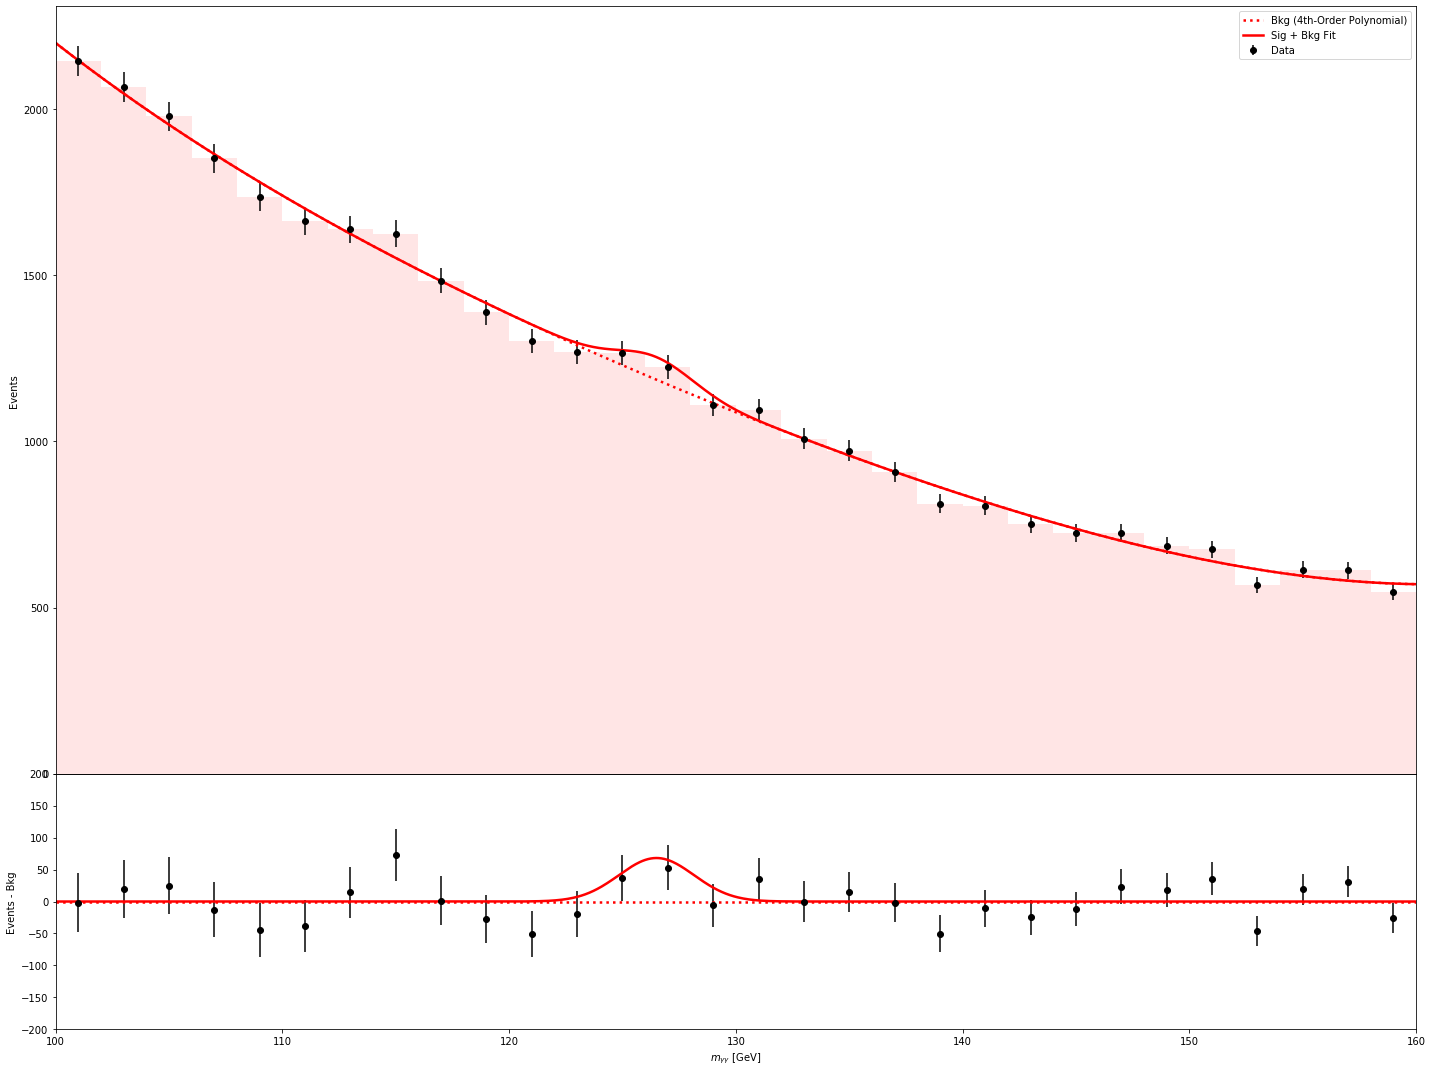

In [34]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df12["invariant_mass"]

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)
xTot = 0.5*(binTot[1:] + binTot[:-1])

errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    valTot = nTot[i]
    errorTot = np.sqrt(valTot)
    if valTot == 0: errorTot = 0
    errTot[i] = errorTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[1.08763987e+03, -2.49992665e-02, 2.08249692e-04, 4.08935753e-08, 1.05872337e-07], sigma=errTot)

argsTot = [1.08763987e+03, -2.49992665e-02, 2.08249692e-04, 4.08935753e-08, 1.05872337e-07, 282.512044]
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[3].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

axesBig.legend()
fig.tight_layout()

plt.show()

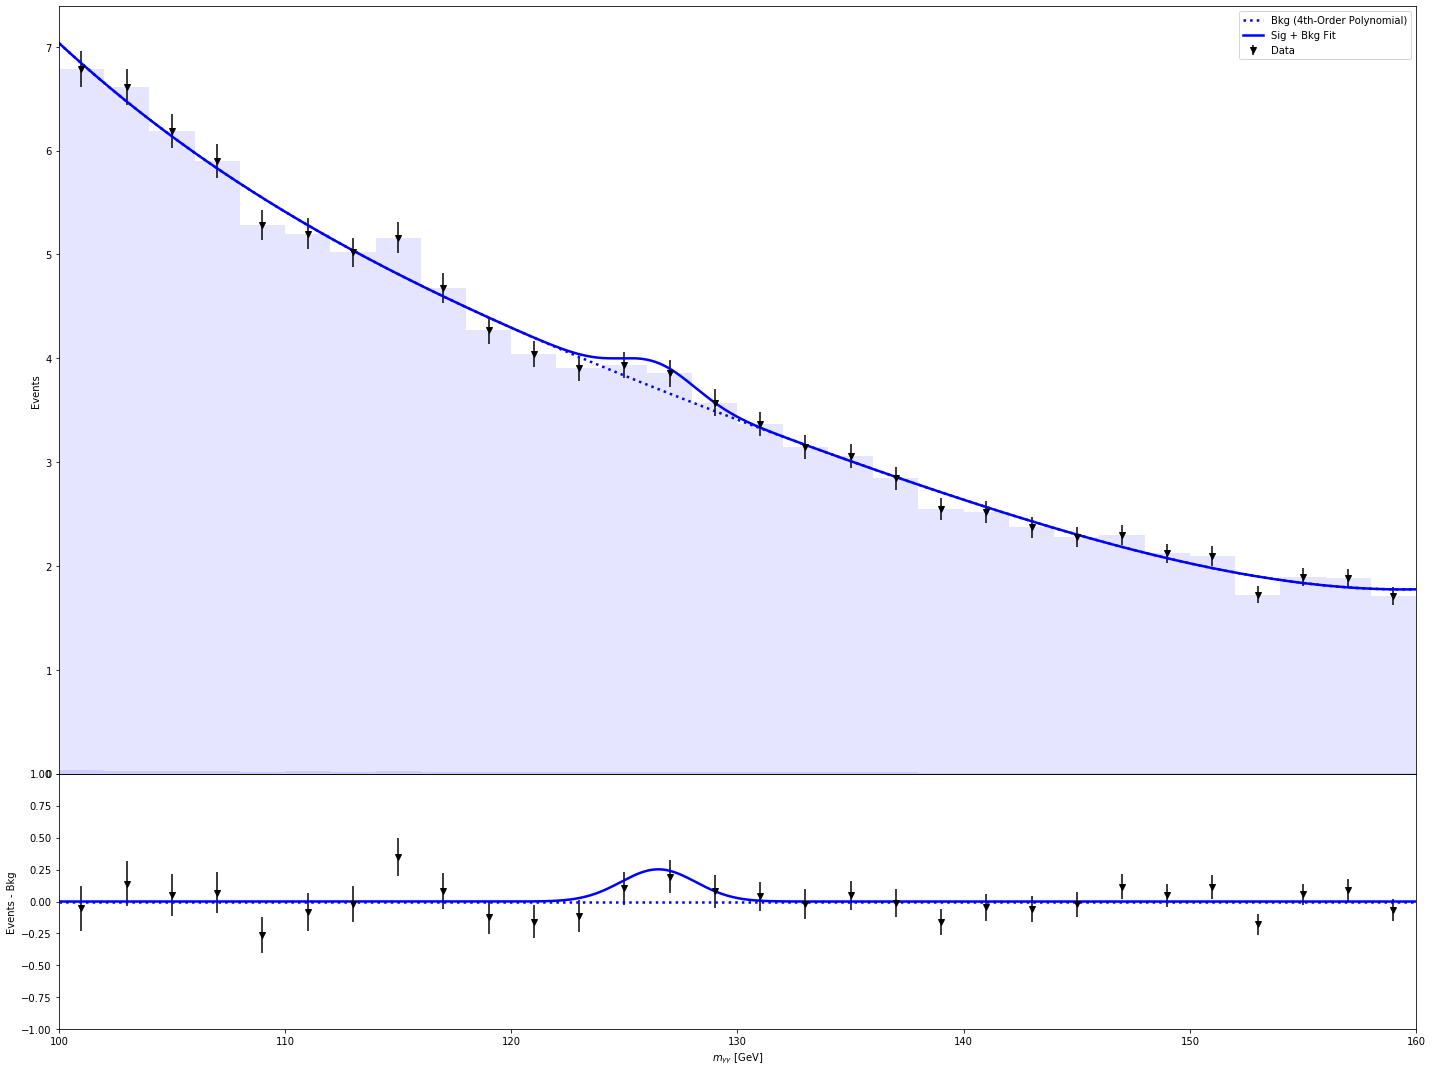

In [37]:
NDTot = [2945, 173, 12136, 785, 2015, 113, 11099, 706, 5140, 139]   # number of events 7&8 TeV
NSTot = [14.2, 2.5, 30.9, 5.2, 8.9, 1.6, 26.9, 4.5, 12.8, 3.0]        # number of signals 7&8 TeV

weights, w = [], []
for i in range(len(NSTot)):
    w.append(np.log(1 + NSTot[i]/NDTot[i]))
    
w1 = w[0]*np.ones(len(cat1))
w2 = w[1]*np.ones(len(cat2))
w3 = w[2]*np.ones(len(cat3))
w4 = w[3]*np.ones(len(cat4))
w5 = w[4]*np.ones(len(cat5))
w6 = w[5]*np.ones(len(cat6))
w7 = w[6]*np.ones(len(cat7))
w8 = w[7]*np.ones(len(cat8))
w9 = w[8]*np.ones(len(cat9))
w10 = w[9]*np.ones(len(cat10))

weights.extend(w1)
weights.extend(w2)
weights.extend(w3)
weights.extend(w4)
weights.extend(w5)
weights.extend(w6)
weights.extend(w7)
weights.extend(w8)
weights.extend(w9)
weights.extend(w10)

FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df12["invariant_mass"]

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nWghtTot0, binWghtTot0, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights))
nWghtTot, binWghtTot, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights)**2)
xWghtTot = 0.5*(binWghtTot[1:] + binWghtTot[:-1])

errWghtTot = np.zeros(len(nWghtTot))
for i in range(len(nWghtTot)):
    valWghtTot = nWghtTot[i]
    errorWghtTot = np.sqrt(valWghtTot)
    if valWghtTot == 0: errorWghtTot = 1
    errWghtTot[i] = errorWghtTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

#optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot, p0=[2.65903069, 9.47351207e+05, 2.22671415e+04, 1.74456066e+02, 4.55591718e-01], sigma=errWghtTot)
optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot0, sigma=errWghtTot)

argsWghtTot = np.concatenate([optWghtTot, np.array([1.04514440])])

optWghtTotN, covWghtTotN = curve_fit(modelN, xdata=xWghtTot, ydata=nWghtTot0, p0=argsWghtTot, sigma=errWghtTot)

#print(optWghtTotN)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optWghtTot) - model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5)

axesBig.plot(massRng, modelN(massRng, *argsWghtTot), color='b', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsWghtTot) - model(massRng, *optWghtTot), color='b', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-1, 1)

axesBig.errorbar(xWghtTot, nWghtTot0, yerr=errWghtTot, color='k', fmt='v', label='Data')
ax[3].errorbar(xWghtTot, nWghtTot0 - model(xWghtTot, *optWghtTot), yerr=errWghtTot, color='k', fmt='v')

axesBig.legend()
fig.tight_layout()

plt.show()

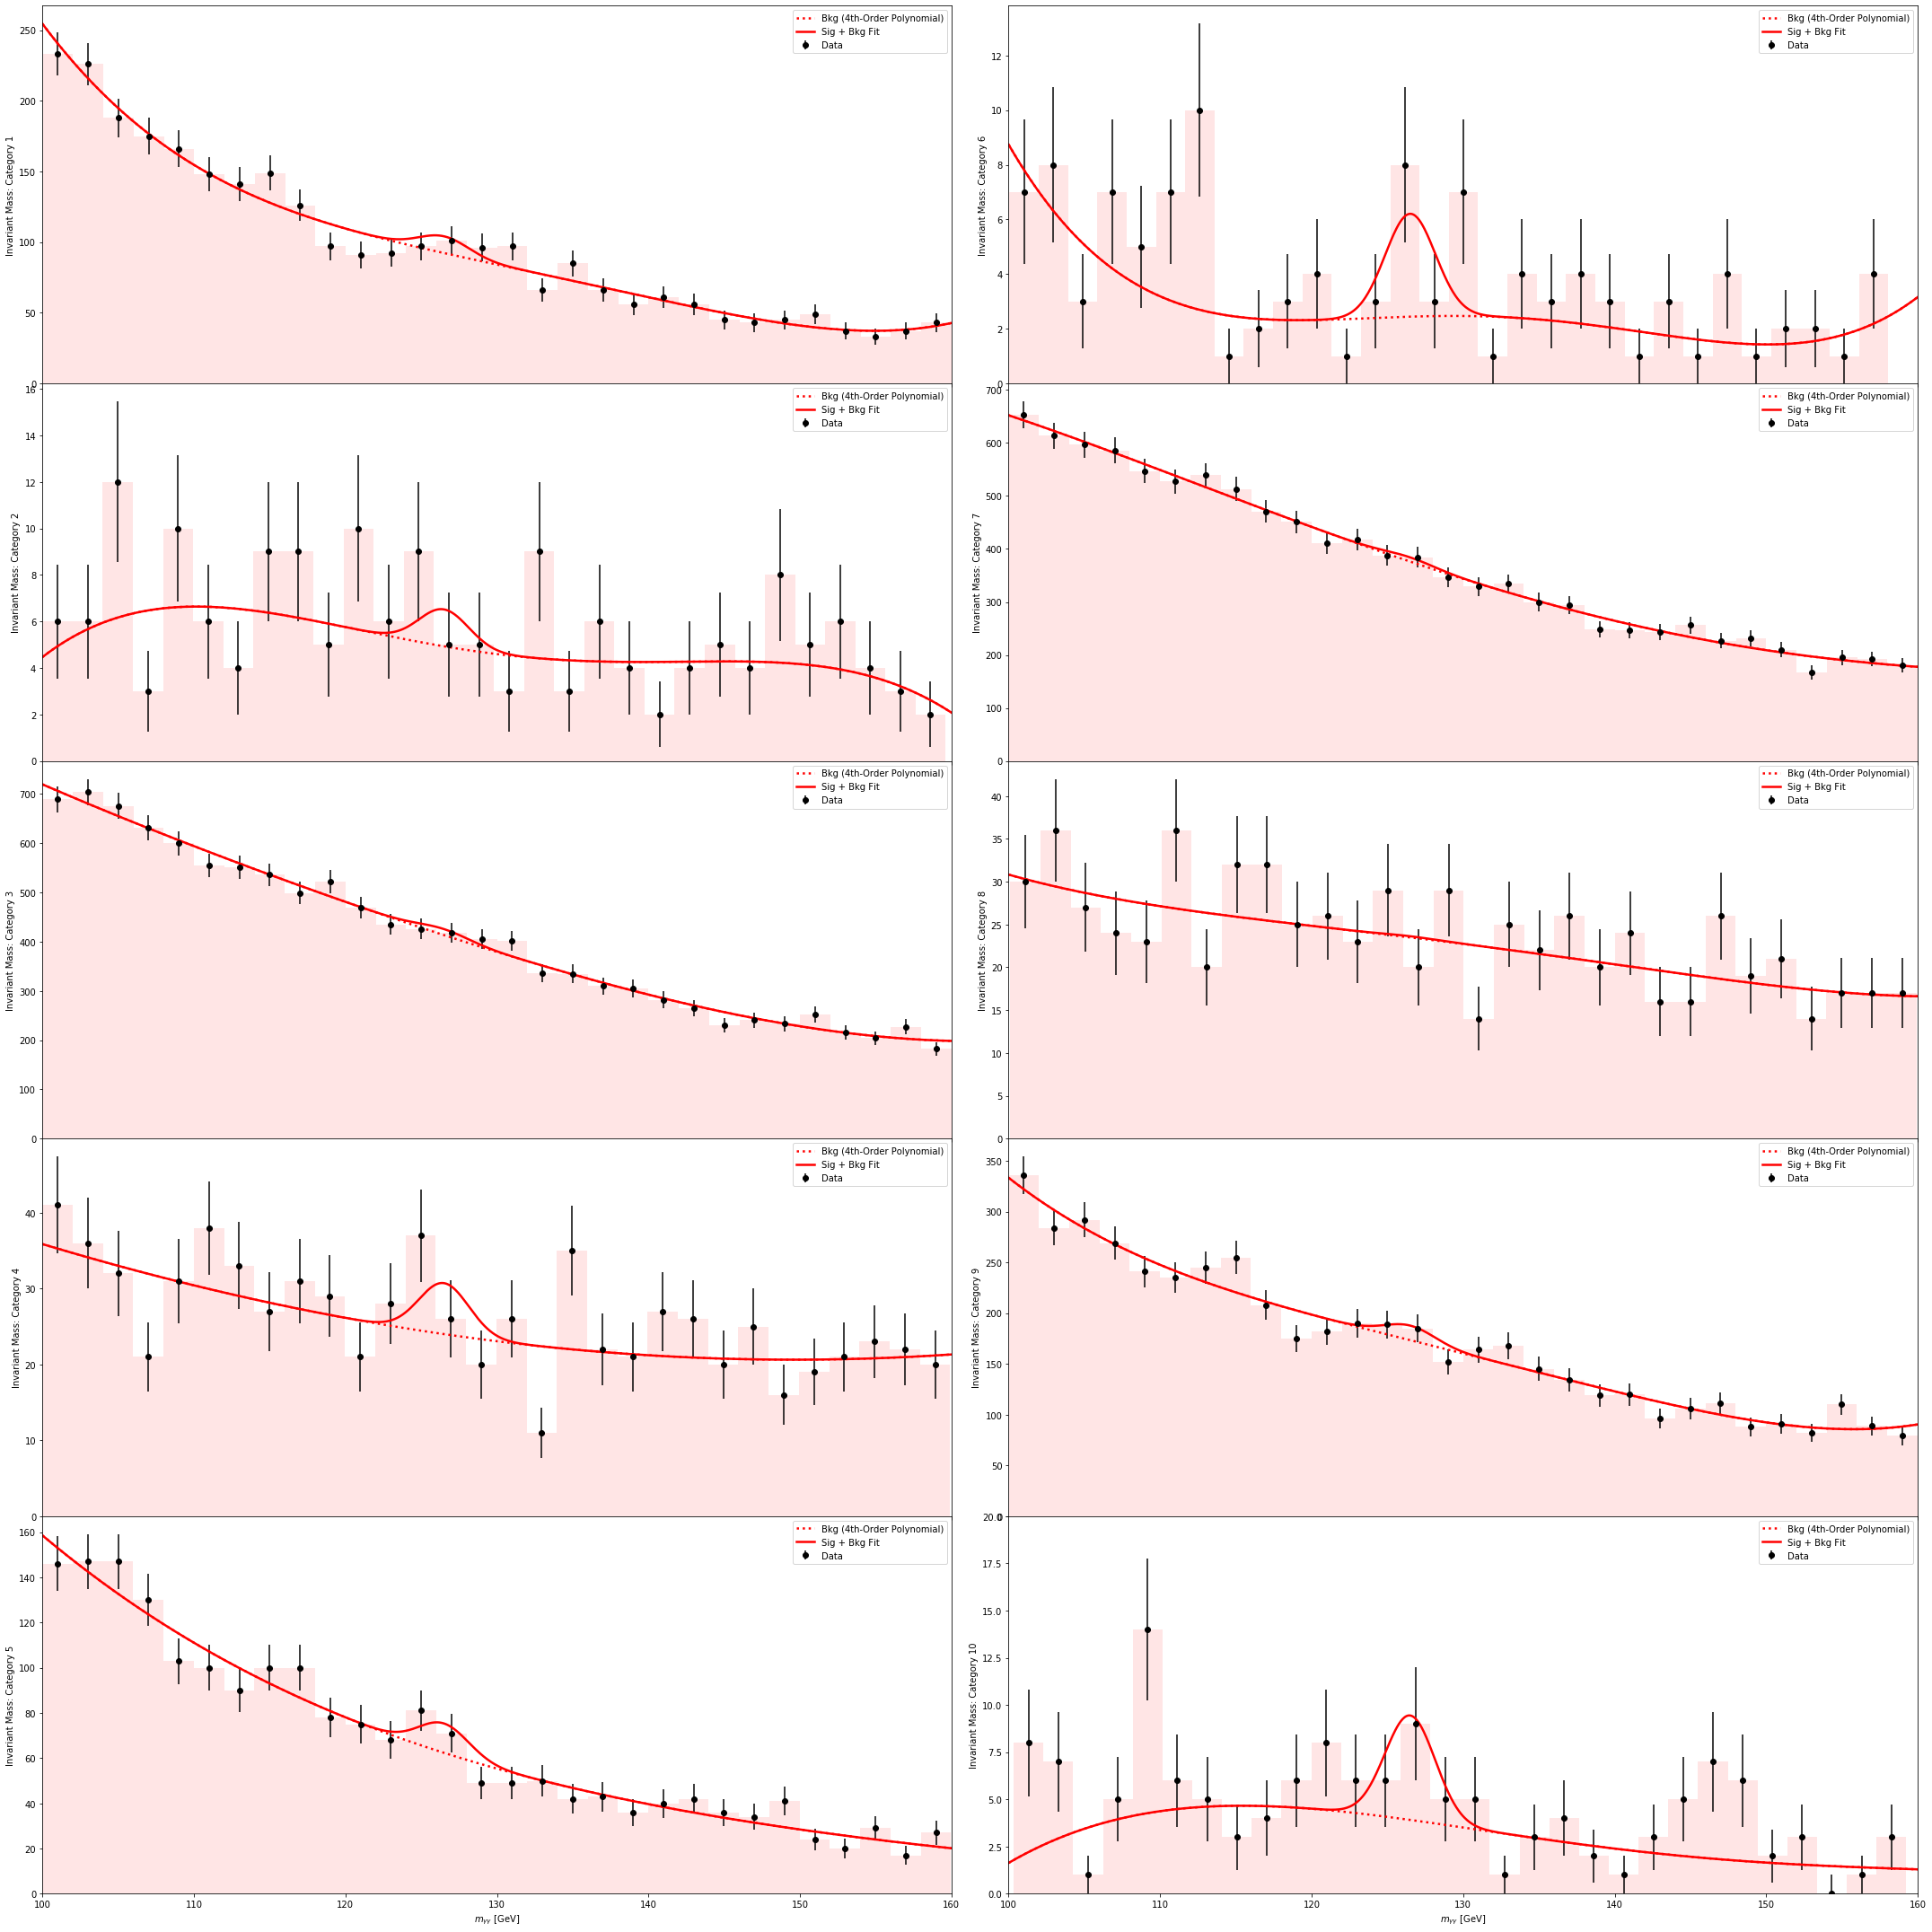

In [79]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df12["invariant_mass"]

fig, ax = plt.subplots(5, 2, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10 = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10 = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10)
    if val1 == 0: error1 = 1
    if val2 == 0: error2 = 1
    if val3 == 0: error3 = 1
    if val4 == 0: error4 = 1
    if val5 == 0: error5 = 1
    if val6 == 0: error6 = 1
    if val7 == 0: error7 = 1
    if val8 == 0: error8 = 1
    if val9 == 0: error9 = 1
    if val10 == 0: error10 = 1
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i] = error6, error7, error8, error9, error10

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[84.0737856, -2.72951300e-02, 5.10297359e-05, -1.63271389e-05, 8.91174399e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[4.59581679, -1.72830616e-02, 1.04515112e-03, 9.58704023e-06, -1.51719756e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[379.190512, -2.50978568e-02, 1.91937752e-04, 2.43127384e-06, 4.63981395e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[23.0563749, -1.07078021e-02, 2.68365970e-04, 2.10302997e-07, -1.88203898e-09], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[55.3727820, -3.38217254e-02, 6.24001387e-04, -8.72288635e-06, 6.41864496e-08], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[2.46596841, -1.96367874e-03, -1.54991684e-03, -3.97283932e-05, 3.46558322e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[343.656501, -2.61147388e-02, 2.78538626e-04, 3.43866835e-06, -5.35034607e-08], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[22.7303718, -9.81763075e-03, -7.37279739e-05, -6.69502266e-07, 1.35621408e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[160.285893, -2.33655372e-02, -1.37395190e-05, -2.11881789e-06, 4.12610887e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[3.50944176, -3.36469068e-02, -1.19464318e-04, 3.55806292e-05, -5.87180670e-07], sigma=err10)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = [84.0737856, -2.72951300e-02, 5.10297359e-05, -1.63271389e-05, 8.91174399e-07, 49.2593761]
args2 = [4.59581679, -1.72830616e-02, 1.04515112e-03, 9.58704023e-06, -1.51719756e-06, 6.59279034]
args3 = [379.190512, -2.50978568e-02, 1.91937752e-04, 2.43127384e-06, 4.63981395e-08, 50.7190570]
args4 = [23.0563749, -1.07078021e-02, 2.68365970e-04, 2.10302997e-07, -1.88203898e-09, 27.9101523]
args5 = [55.3727820, -3.38217254e-02, 6.24001387e-04, -8.72288635e-06, 6.41864496e-08, 53.9321493]
args6 = [2.46596841, -1.96367874e-03, -1.54991684e-03, -3.97283932e-05, 3.46558322e-06, 15.6230131]
args7 = [343.656501, -2.61147388e-02, 2.78538626e-04, 3.43866835e-06, -5.35034607e-08, 33.0581354]
args8 = [22.7303718, -9.81763075e-03, -7.37279739e-05, -6.69502266e-07, 1.35621408e-07, 0.575727520]
args9 = [160.285893, -2.33655372e-02, -1.37395190e-05, -2.11881789e-06, 4.12610887e-07, 59.7037357]
args10 = [3.50944176, -3.36469068e-02, -1.19464318e-04, 3.55806292e-05, -5.87180670e-07, 22.9576568]

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)

ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[4, 1].set_ylim(0, 20)

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
fig.tight_layout()

plt.show()

# 7 MeV Code

In [6]:
df11 = tree11.pandas.df()
df11

,RunNumber,EventNumber,lbn,JetMultiplicity,averageIntPerXing,PV_n,vtx_z,invariant_mass,ph_pt_leading,ph_pt_subleading,...,ph_phi_subleading,ph_E_corrected_leading,ph_E_corrected_subleading,ph_isConv_leading,ph_isConv_subleading,categ_Model5Categories,categ_Model10Categories,categ_ModelHighPttEtaConvVBF,categ_ModelHighPttGoodBadVBF,categ_conversion
entry,,,,,,,,,,,,,,,,,,,,,
0,178044,59092042,610,0,4.69,3,-36.334637,139.232890,52533.719335,32782.963589,...,0.442753,81667.462315,59620.956933,-3.946396e+217,7.923808e-171,3,3,2,2,1
1,178044,10545724,169,1,7.22,6,-51.976826,116.209764,48068.773796,35084.511299,...,1.156631,51834.123239,83346.475144,-2.881612e+252,3.047353e+121,3,9,5,2,5
2,178044,4030696,117,1,7.70,4,59.194187,123.463192,66882.842732,57844.882516,...,1.981219,192879.082939,159475.730438,5.916449e-292,1.539664e+268,3,9,5,2,2
3,178044,18669075,228,0,6.70,8,-27.361750,102.314084,52664.298861,49105.711086,...,-0.715360,86287.043609,66555.838688,-4.927680e+232,1.149180e-01,3,7,4,2,5
4,178044,19086286,231,1,6.68,8,43.003052,119.114024,64409.197133,43477.276417,...,-1.061157,67411.609054,55797.245401,-3.936841e+208,7.108699e-07,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23783,191933,61490596,284,1,13.49,12,-34.320892,108.791853,62485.900552,34191.706820,...,0.508081,96982.724656,35566.090488,-1.046044e+161,4.608386e+143,3,3,2,2,1
23784,191933,62339309,287,1,13.44,11,-114.932846,121.032097,98224.984164,37777.674290,...,2.307466,446007.798038,130600.172331,-1.039896e+308,-3.456510e+166,3,7,4,2,5
23785,191933,62600643,288,0,13.43,10,-160.721176,159.277695,84367.871156,71041.271875,...,0.934145,84558.894789,83429.729608,-3.477691e+252,3.455616e+146,1,5,3,1,5


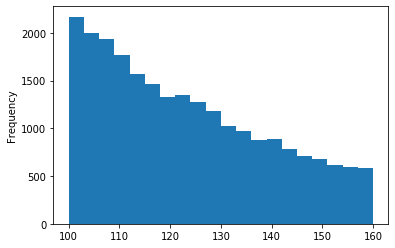

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.yscale('linear')
df11["invariant_mass"].plot.hist(bins=20)

In [25]:
cat1 = df11.loc[df11['categ_Model10Categories'] == 1, 'invariant_mass']
cat2 = df11.loc[df11['categ_Model10Categories'] == 2, 'invariant_mass']
cat3 = df11.loc[df11['categ_Model10Categories'] == 3, 'invariant_mass']
cat4 = df11.loc[df11['categ_Model10Categories'] == 4, 'invariant_mass']
cat5 = df11.loc[df11['categ_Model10Categories'] == 5, 'invariant_mass']
cat6 = df11.loc[df11['categ_Model10Categories'] == 6, 'invariant_mass']
cat7 = df11.loc[df11['categ_Model10Categories'] == 7, 'invariant_mass']
cat8 = df11.loc[df11['categ_Model10Categories'] == 8, 'invariant_mass']
cat9 = df11.loc[df11['categ_Model10Categories'] == 9, 'invariant_mass']
cat10 = df11.loc[df11['categ_Model10Categories'] == 10, 'invariant_mass']

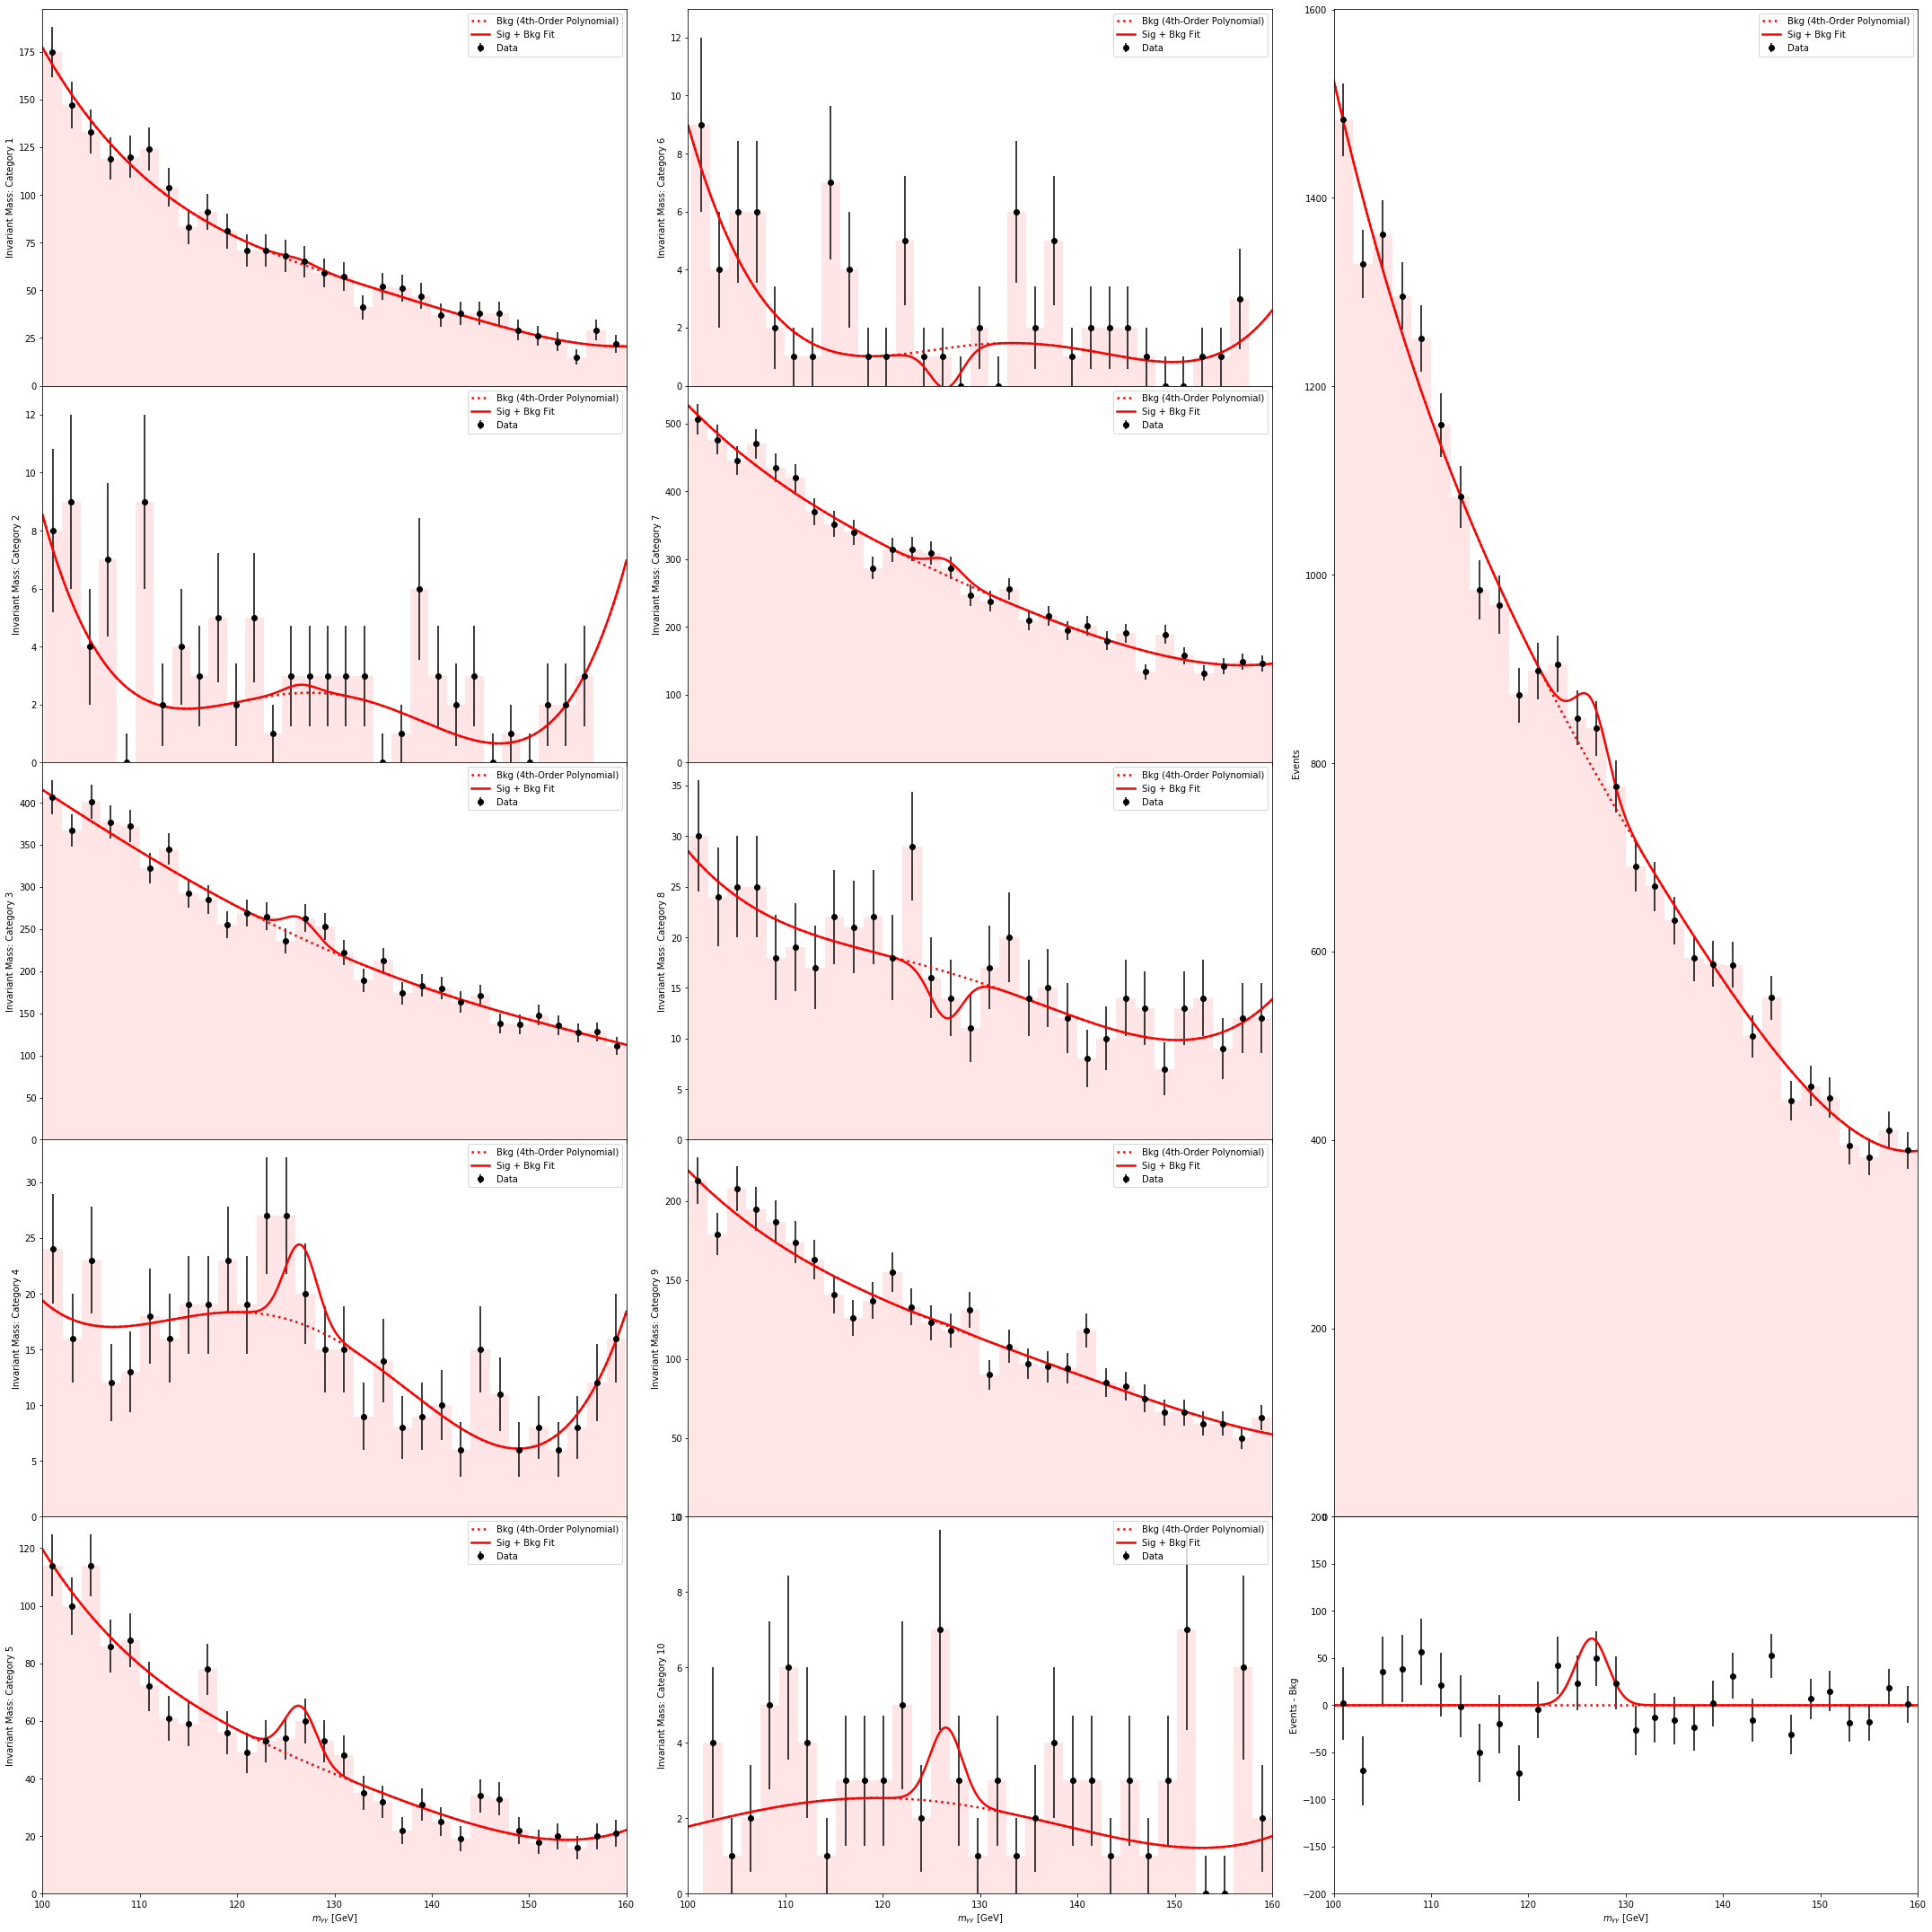

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.optimize import curve_fit

# FWHM = 2*sqrt(2*ln(2)) * sigma
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df11["invariant_mass"]

def model(m, a0, b1, b2, b3, b4):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4)

def modelN(m, a0, b1, b2, b3, b4, A):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4) + A*(np.exp(-0.5*((m-mu)/sigmaTot)**2)/(sigmaTot*np.sqrt(2*np.pi)))

# a0 is the number of events in the histogram at m = 130
# a0*b1 is the rough slope of the graph
# b1, b2, b3, b4 should be fairly small

# Plotting
fig, ax = plt.subplots(5, 3, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

ax[0, 2].remove()
ax[1, 2].remove()
ax[2, 2].remove()
ax[3, 2].remove()

gs = ax[0, 2].get_gridspec()
axesBig = fig.add_subplot(gs[0:4, 2])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)

#err1 = np.sqrt(n1)
#err2 = np.sqrt(n2)
#err3 = np.sqrt(n3)
#err4 = np.sqrt(n4)
#err5 = np.sqrt(n5)
#err6 = np.sqrt(n6)
#err7 = np.sqrt(n7)
#err8 = np.sqrt(n8)
#err9 = np.sqrt(n8)
#err10 = np.sqrt(n10)
#errTot = np.sqrt(nTot)


# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, valTot = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i], nTot[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10, errorTot = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10), np.sqrt(valTot)
    if val1 == 0: error1 = 1
    if val2 == 0: error2 = 1
    if val3 == 0: error3 = 1
    if val4 == 0: error4 = 1
    if val5 == 0: error5 = 1
    if val6 == 0: error6 = 1
    if val7 == 0: error7 = 1
    if val8 == 0: error8 = 1
    if val9 == 0: error9 = 1
    if val10 == 0: error10 = 1
    if valTot == 0: errorTot = 1
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i], errTot[i] = error6, error7, error8, error9, error10, errorTot

axesBig.set_ylabel('Events')
ax[4, 2].set_ylabel('Events - Bkg')
ax[4, 2].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])
xTot = 0.5*(binTot[1:] + binTot[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[57.7380033, -2.93963074e-02, 2.68527786e-04, -1.75350449e-05, 5.80677450e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[2.92734736, -1.86573322e-02, -1.29279287e-03, -1.10433228e-05, 3.10458084e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[221.613789, -2.23402414e-02, 2.52637180e-04, -4.66717420e-07, -4.53267928e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[15.9227812, -3.03073567e-02, -1.36048079e-03, 3.25451743e-05, 1.74179678e-06], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[41.5971676, -3.34152366e-02, 2.42618685e-04, -6.24845594e-06, 5.97966247e-07], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[2.44382576, -3.24372586e-03, -2.00692575e-03, -4.33311333e-05, 4.13240632e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[253.719800, -2.47693816e-02, 1.87103778e-04, -2.56191060e-07, 1.94251026e-07], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[15.5196455, -2.07113475e-02, -3.05843185e-04, 5.54435789e-06, 7.90346539e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[113.050455, -2.05170390e-02, 7.17680826e-05, -4.59746512e-06, 1.68950318e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[2.88124597, -1.89612472e-02, 3.91091467e-04, 2.63916308e-05, -5.77979252e-07], sigma=err10)
optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[733.811901, -2.38592815e-02, 1.51639171e-04, -2.16786139e-06, 2.06378818e-07], sigma=errTot)
#opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, sigma=err1)
#opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, sigma=err2)
#opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, sigma=err3)
#opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, sigma=err4)
#opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, sigma=err5)
#opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, sigma=err6)
#opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, sigma=err7)
#opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, sigma=err8)
#opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, sigma=err9)
#opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, sigma=err10)
#optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, sigma=errTot)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = np.concatenate([opt1, np.array([9.30404177])])
args2 = np.concatenate([opt2, np.array([1.17497954])])
args3 = np.concatenate([opt3, np.array([9.83970812e+01])])
args4 = np.concatenate([opt4, np.array([2.93209614e+01])])
args5 = np.concatenate([opt5, np.array([7.69320604e+01])])
args6 = np.concatenate([opt6, np.array([-5.72046156])])
args7 = np.concatenate([opt7, np.array([9.46956627e+01])])
args8 = np.concatenate([opt8, np.array([-1.89650407e+01])])
args9 = np.concatenate([opt9, np.array([3.56334463])])
args10 = np.concatenate([opt10, np.array([8.25380892])])
argsTot = np.concatenate([optTot, np.array([2.93810951e+02])])

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)
#optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, sigma=err1)
#optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, sigma=err2)
#optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, sigma=err3)
#optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, sigma=err4)
#optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, sigma=err5)
#optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, sigma=err6)
#optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, sigma=err7)
#optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, sigma=err8)
#optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, sigma=err9)
#optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, sigma=err10)
#optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, sigma=errTot)

#ax[0, 0].plot(massRng, modelN(massRng, *optN1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 0].plot(massRng, modelN(massRng, *optN2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 0].plot(massRng, modelN(massRng, *optN3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 0].plot(massRng, modelN(massRng, *optN4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 0].plot(massRng, modelN(massRng, *optN5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[0, 1].plot(massRng, modelN(massRng, *optN6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 1].plot(massRng, modelN(massRng, *optN7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 1].plot(massRng, modelN(massRng, *optN8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 1].plot(massRng, modelN(massRng, *optN9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 1].plot(massRng, modelN(massRng, *optN10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[1, 0].set_ylim(0, 13)
ax[0, 1].set_ylim(0, 13)
ax[4, 1].set_ylim(0, 10)

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 2].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 2].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[4, 2].set_xlim(100, 160)
ax[4, 2].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[4, 2].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
axesBig.legend()
fig.tight_layout()

plt.show()

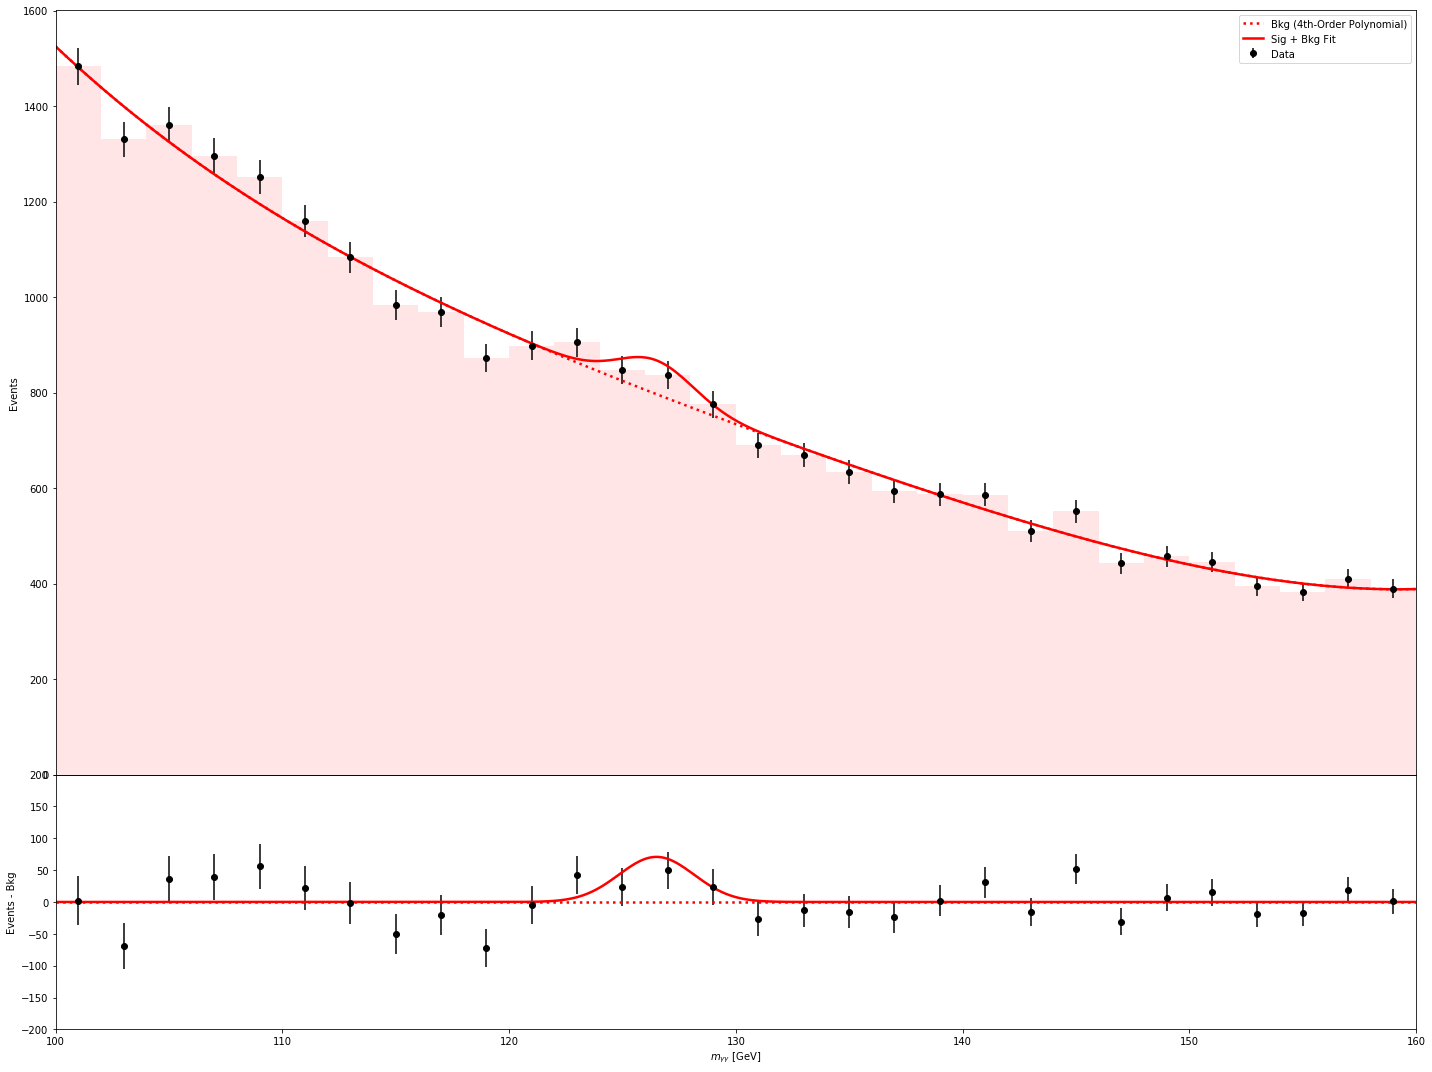

In [27]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df11["invariant_mass"]

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)
xTot = 0.5*(binTot[1:] + binTot[:-1])

errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    valTot = nTot[i]
    errorTot = np.sqrt(valTot)
    if valTot == 0: errorTot = 0
    errTot[i] = errorTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[733.811901, -2.38592815e-02, 1.51639171e-04, -2.16786139e-06, 2.06378818e-07], sigma=errTot)

argsTot = [733.811901, -2.38592815e-02, 1.51639171e-04, -2.16786139e-06, 2.06378818e-07, 293.810866]
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[3].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

axesBig.legend()
fig.tight_layout()

plt.show()

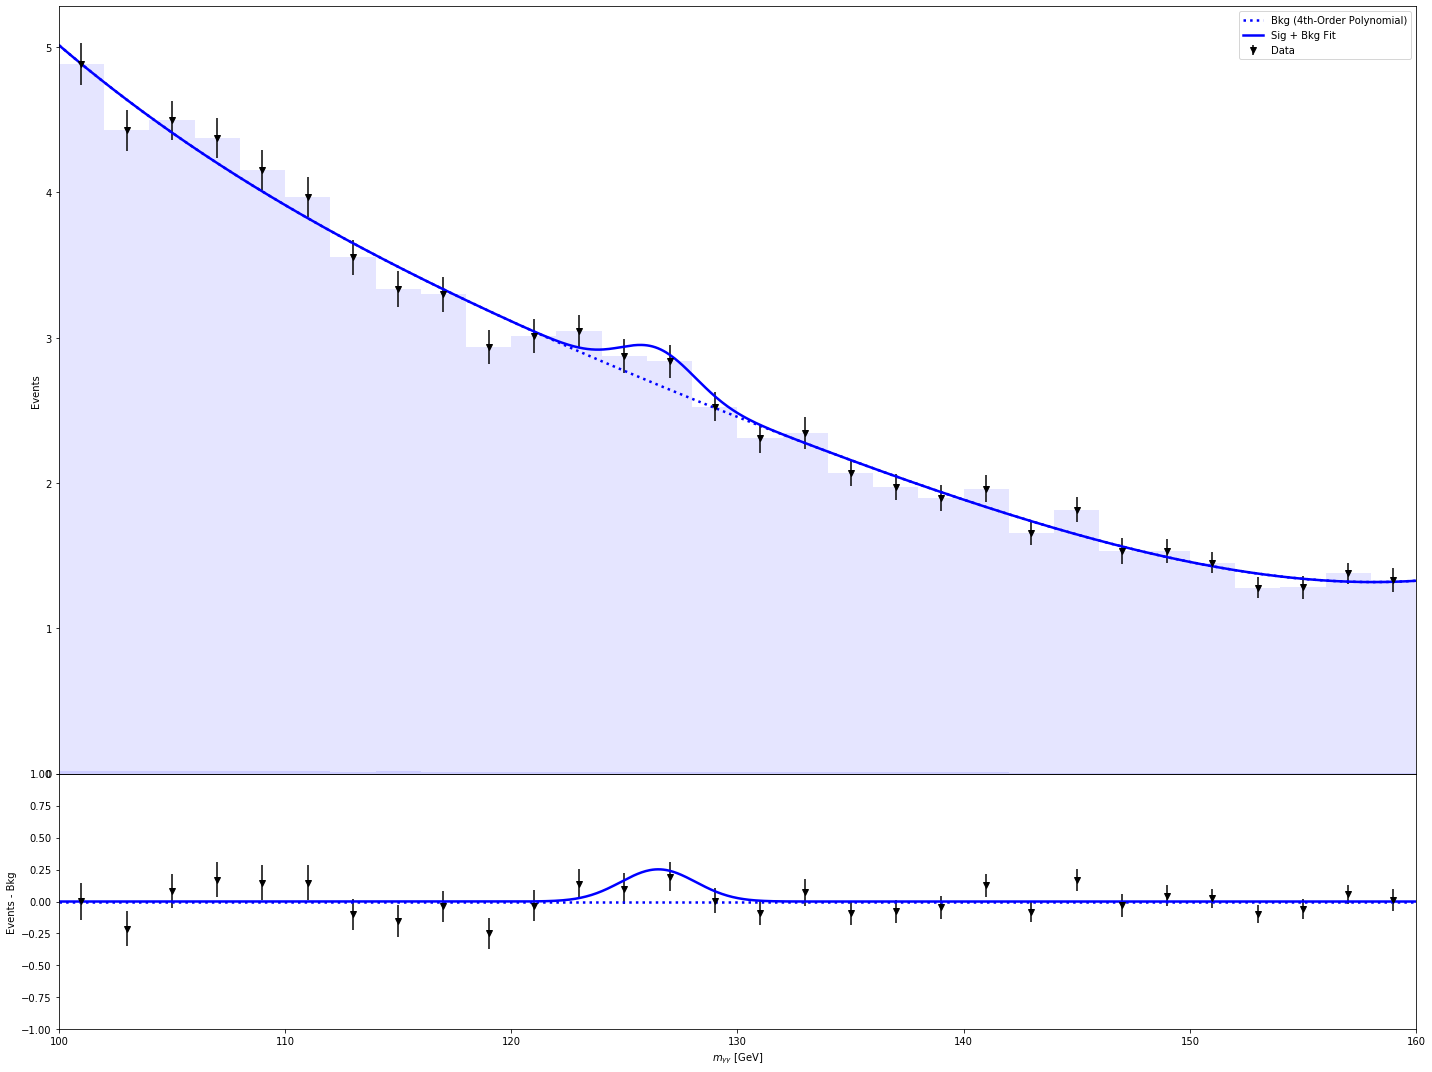

In [31]:
NDTot = [2054, 97, 7129, 444, 1493, 77, 8313, 501, 3591, 89]   # number of events 7&8 TeV
NSTot = [10.5, 1.5, 21.6, 2.8, 6.7, 1, 21.2, 2.7, 9.5, 2.2]        # number of signals 7&8 TeV

weights, w = [], []
for i in range(len(NSTot)):
    w.append(np.log(1 + NSTot[i]/NDTot[i]))
    
w1 = w[0]*np.ones(len(cat1))
w2 = w[1]*np.ones(len(cat2))
w3 = w[2]*np.ones(len(cat3))
w4 = w[3]*np.ones(len(cat4))
w5 = w[4]*np.ones(len(cat5))
w6 = w[5]*np.ones(len(cat6))
w7 = w[6]*np.ones(len(cat7))
w8 = w[7]*np.ones(len(cat8))
w9 = w[8]*np.ones(len(cat9))
w10 = w[9]*np.ones(len(cat10))

weights.extend(w1)
weights.extend(w2)
weights.extend(w3)
weights.extend(w4)
weights.extend(w5)
weights.extend(w6)
weights.extend(w7)
weights.extend(w8)
weights.extend(w9)
weights.extend(w10)

FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df11["invariant_mass"]

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nWghtTot0, binWghtTot0, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights))
nWghtTot, binWghtTot, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights)**2)
xWghtTot = 0.5*(binWghtTot[1:] + binWghtTot[:-1])

errWghtTot = np.zeros(len(nWghtTot))
for i in range(len(nWghtTot)):
    valWghtTot = nWghtTot[i]
    errorWghtTot = np.sqrt(valWghtTot)
    if valWghtTot == 0: errorWghtTot = 1
    errWghtTot[i] = errorWghtTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

#optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot, p0=[2.65903069, 9.47351207e+05, 2.22671415e+04, 1.74456066e+02, 4.55591718e-01], sigma=errWghtTot)
optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot0, sigma=errWghtTot)

argsWghtTot = np.concatenate([optWghtTot, np.array([1.04520448])])

optWghtTotN, covWghtTotN = curve_fit(modelN, xdata=xWghtTot, ydata=nWghtTot0, p0=argsWghtTot, sigma=errWghtTot)

#print(optWghtTotN)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optWghtTot) - model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5)

axesBig.plot(massRng, modelN(massRng, *argsWghtTot), color='b', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsWghtTot) - model(massRng, *optWghtTot), color='b', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-1, 1)

axesBig.errorbar(xWghtTot, nWghtTot0, yerr=errWghtTot, color='k', fmt='v', label='Data')
ax[3].errorbar(xWghtTot, nWghtTot0 - model(xWghtTot, *optWghtTot), yerr=errWghtTot, color='k', fmt='v')

axesBig.legend()
fig.tight_layout()

plt.show()

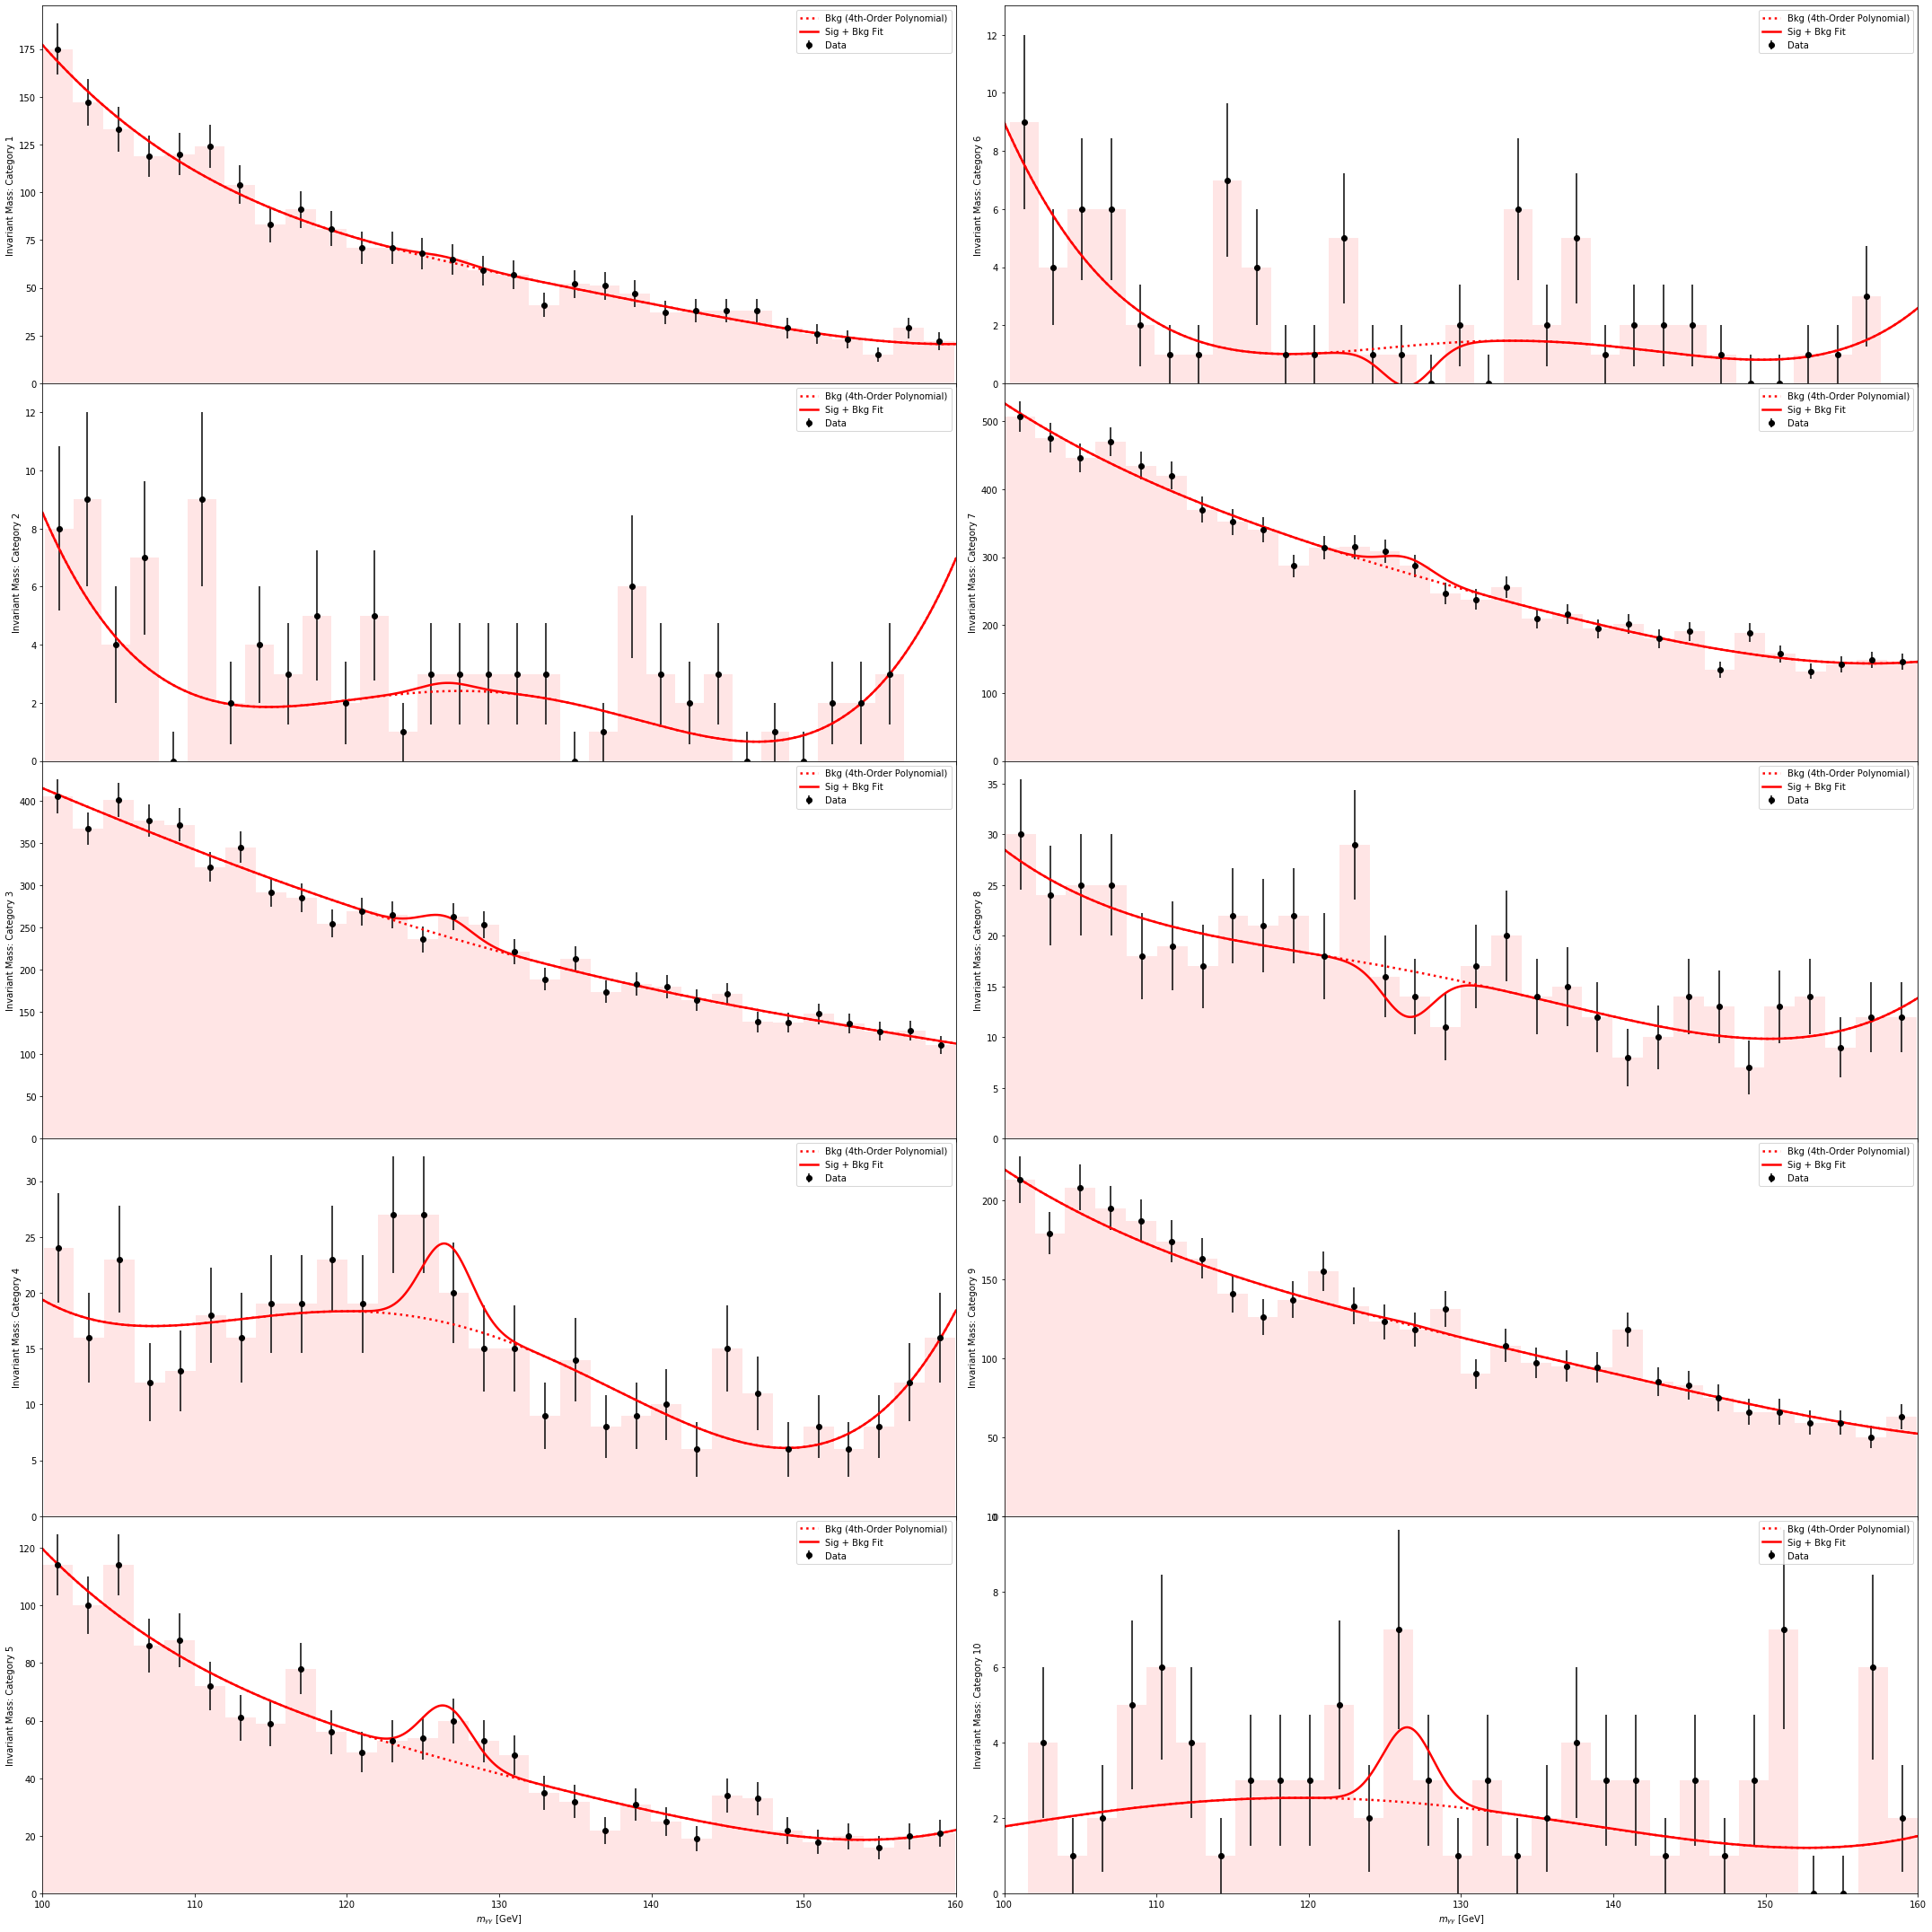

In [76]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = df11["invariant_mass"]

fig, ax = plt.subplots(5, 2, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10 = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10 = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10)
    if val1 == 0: error1 = 1
    if val2 == 0: error2 = 1
    if val3 == 0: error3 = 1
    if val4 == 0: error4 = 1
    if val5 == 0: error5 = 1
    if val6 == 0: error6 = 1
    if val7 == 0: error7 = 1
    if val8 == 0: error8 = 1
    if val9 == 0: error9 = 1
    if val10 == 0: error10 = 1
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i] = error6, error7, error8, error9, error10

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[57.7380033, -2.93963074e-02, 2.68527786e-04, -1.75350449e-05, 5.80677450e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[2.92734736, -1.86573322e-02, -1.29279287e-03, -1.10433228e-05, 3.10458084e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[221.613789, -2.23402414e-02, 2.52637180e-04, -4.66717420e-07, -4.53267928e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[15.9227812, -3.03073567e-02, -1.36048079e-03, 3.25451743e-05, 1.74179678e-06], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[41.5971676, -3.34152366e-02, 2.42618685e-04, -6.24845594e-06, 5.97966247e-07], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[2.44382576, -3.24372586e-03, -2.00692575e-03, -4.33311333e-05, 4.13240632e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[253.719800, -2.47693816e-02, 1.87103778e-04, -2.56191060e-07, 1.94251026e-07], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[15.5196455, -2.07113475e-02, -3.05843185e-04, 5.54435789e-06, 7.90346539e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[113.050455, -2.05170390e-02, 7.17680826e-05, -4.59746512e-06, 1.68950318e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[2.88124597, -1.89612472e-02, 3.91091467e-04, 2.63916308e-05, -5.77979252e-07], sigma=err10)
optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[733.811901, -2.38592815e-02, 1.51639171e-04, -2.16786139e-06, 2.06378818e-07], sigma=errTot)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = np.concatenate([opt1, np.array([9.30404177])])
args2 = np.concatenate([opt2, np.array([1.17497954])])
args3 = np.concatenate([opt3, np.array([9.83970812e+01])])
args4 = np.concatenate([opt4, np.array([2.93209614e+01])])
args5 = np.concatenate([opt5, np.array([7.69320604e+01])])
args6 = np.concatenate([opt6, np.array([-5.72046156])])
args7 = np.concatenate([opt7, np.array([9.46956627e+01])])
args8 = np.concatenate([opt8, np.array([-1.89650407e+01])])
args9 = np.concatenate([opt9, np.array([3.56334463])])
args10 = np.concatenate([opt10, np.array([8.25380892])])

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)

ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[1, 0].set_ylim(0, 13)
ax[0, 1].set_ylim(0, 13)
ax[4, 1].set_ylim(0, 10)

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
fig.tight_layout()

plt.show()

# Combined Energies

In [3]:
import pandas

df11 = tree11.pandas.df()
df12 = tree12.pandas.df()

cat1 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 1, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 1, 'invariant_mass']])
cat2 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 2, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 2, 'invariant_mass']])
cat3 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 3, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 3, 'invariant_mass']])
cat4 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 4, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 4, 'invariant_mass']])
cat5 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 5, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 5, 'invariant_mass']])
cat6 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 6, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 6, 'invariant_mass']])
cat7 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 7, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 7, 'invariant_mass']])
cat8 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 8, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 8, 'invariant_mass']])
cat9 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 9, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 9, 'invariant_mass']])
cat10 = pandas.concat([df11.loc[df11['categ_Model10Categories'] == 10, 'invariant_mass'], df12.loc[df12['categ_Model10Categories'] == 10, 'invariant_mass']])

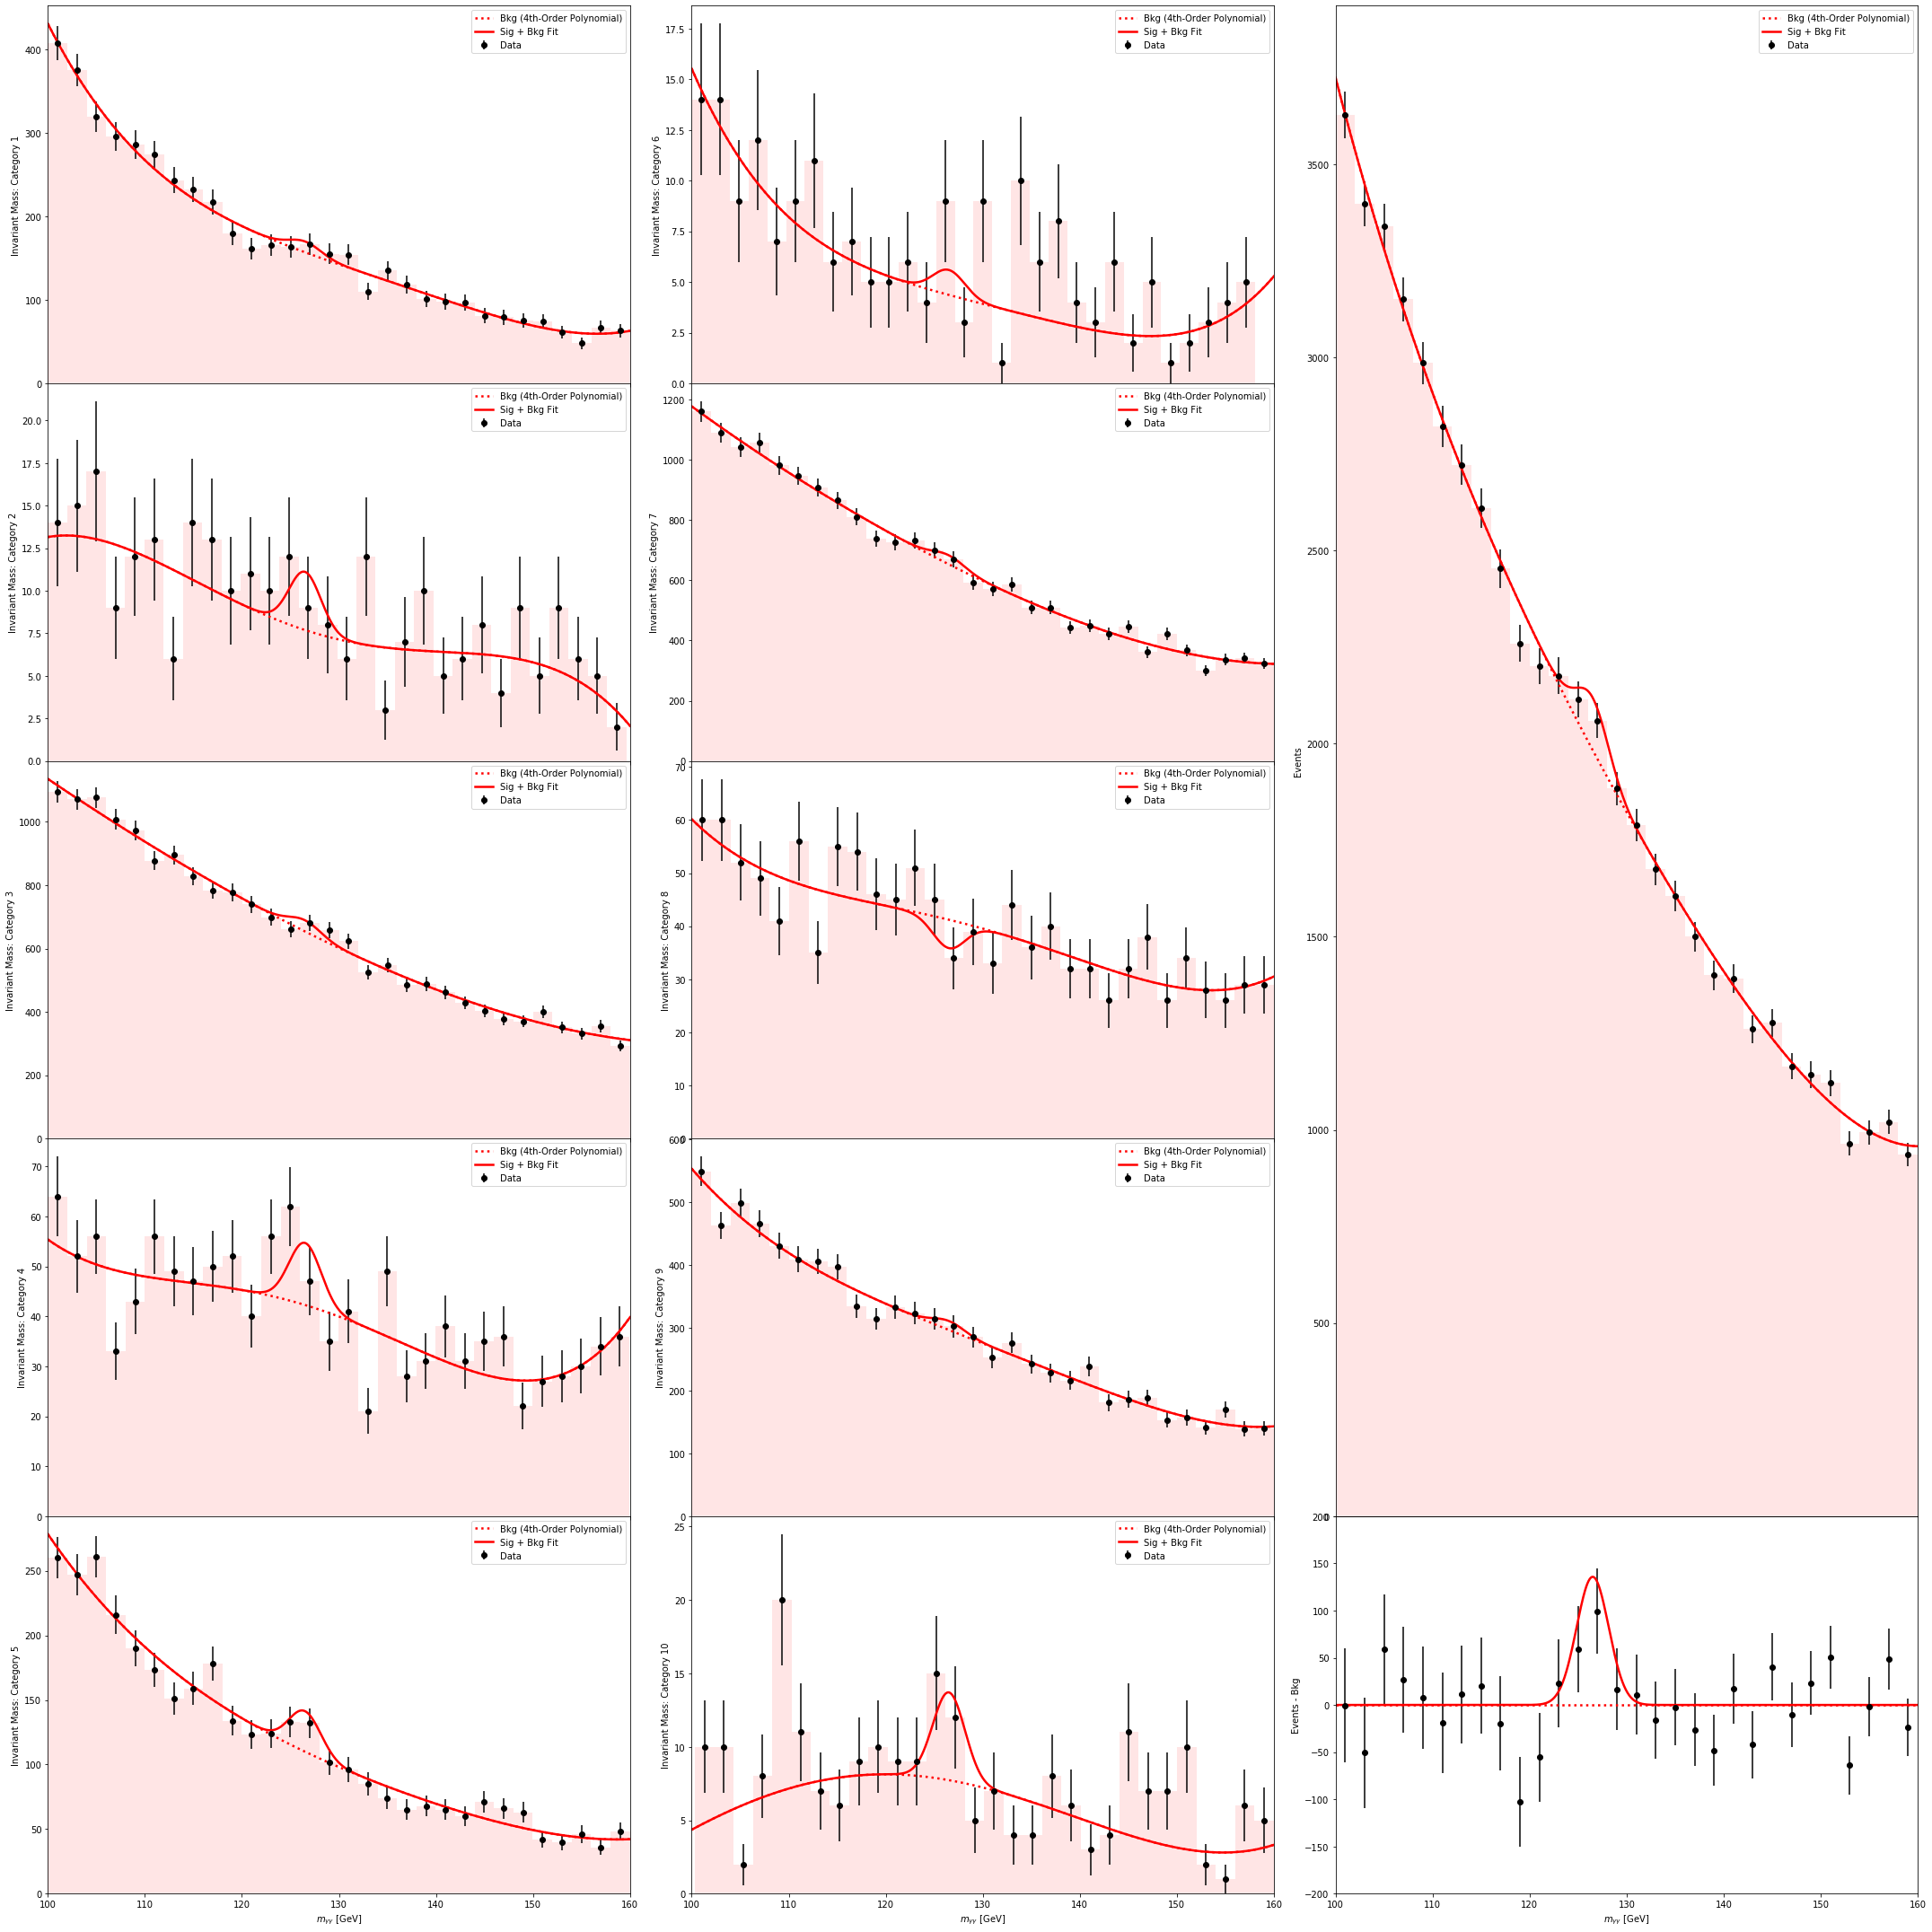

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
from scipy.optimize import curve_fit

# FWHM = 2*sqrt(2*ln(2)) * sigma
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = pandas.concat([df11["invariant_mass"], df12["invariant_mass"]])

def model(m, a0, b1, b2, b3, b4):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4)

def modelN(m, a0, b1, b2, b3, b4, A):
    return a0*(1 + b1*(m-130) + b2*(m-130)**2 + b3*(m-130)**3 + b4*(m-130)**4) + A*(np.exp(-0.5*((m-mu)/sigmaTot)**2)/(sigmaTot*np.sqrt(2*np.pi)))

# a0 is the number of events in the histogram at m = 130
# a0*b1 is the rough slope of the graph
# b1, b2, b3, b4 should be fairly small

# Plotting
fig, ax = plt.subplots(5, 3, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

ax[0, 2].remove()
ax[1, 2].remove()
ax[2, 2].remove()
ax[3, 2].remove()

gs = ax[0, 2].get_gridspec()
axesBig = fig.add_subplot(gs[0:4, 2])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)

#err1 = np.sqrt(n1)
#err2 = np.sqrt(n2)
#err3 = np.sqrt(n3)
#err4 = np.sqrt(n4)
#err5 = np.sqrt(n5)
#err6 = np.sqrt(n6)
#err7 = np.sqrt(n7)
#err8 = np.sqrt(n8)
#err9 = np.sqrt(n8)
#err10 = np.sqrt(n10)
#errTot = np.sqrt(nTot)


# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10, valTot = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i], nTot[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10, errorTot = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10), np.sqrt(valTot)
    if val1 == 0: error1 = 0
    if val2 == 0: error2 = 0
    if val3 == 0: error3 = 0
    if val4 == 0: error4 = 0
    if val5 == 0: error5 = 0
    if val6 == 0: error6 = 0
    if val7 == 0: error7 = 0
    if val8 == 0: error8 = 0
    if val9 == 0: error9 = 0
    if val10 == 0: error10 = 0
    if valTot == 0: errorTot = 0
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i], errTot[i] = error6, error7, error8, error9, error10, errorTot

axesBig.set_ylabel('Events')
ax[4, 2].set_ylabel('Events - Bkg')
ax[4, 2].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])
xTot = 0.5*(binTot[1:] + binTot[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[142.429324, -2.81716643e-02, 1.59072467e-04, -1.64871247e-05, 7.26562726e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[7.13242062, -1.85726307e-02, 1.05992972e-03, -8.16959780e-06, -1.09589583e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[601.538605, -2.40674759e-02, 2.14965697e-04, 1.34998850e-06, 1.04043218e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[39.9641519, -1.82351166e-02, -4.37927023e-04, 1.30558776e-05, 7.22833930e-07], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[98.0530884, -3.29554513e-02, 4.50176414e-04, -7.97269579e-06, 2.83235689e-07], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[3.92109870, -3.14913231e-02, 1.30909557e-04, -1.33552463e-05, 1.89539043e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[597.682504, -2.55584896e-02, 2.49626971e-04, 1.90990014e-06, 3.69072892e-08], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[39.5555090, -1.29021948e-02, -2.42258511e-04, 4.64567858e-07, 4.49840752e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[274.963456, -2.21761309e-02, 1.75076384e-05, -2.97582684e-06, 3.08498289e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[7.23083541, -2.31237434e-02, -8.80116946e-04, 2.30539087e-05, 3.99874262e-07], sigma=err10)
optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[1822.34263, -2.45389045e-02, 1.88261525e-04, -8.45680089e-07, 1.42080042e-07], sigma=errTot)
#opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, sigma=err1)
#opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, sigma=err2)
#opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, sigma=err3)
#opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, sigma=err4)
#opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, sigma=err5)
#opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, sigma=err6)
#opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, sigma=err7)
#opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, sigma=err8)
#opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, sigma=err9)
#opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, sigma=err10)
#optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, sigma=errTot)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = [1.42429324e+02, -2.81716643e-02, 1.59072467e-04, -1.64871247e-05, 7.26562726e-07, 53.8102678]
args2 = [7.13242062, -1.85726307e-02, 1.05992972e-03, -8.16959780e-06, -1.09589583e-06, 14.1858651]
args3 = [601.538605, -2.40674759e-02, 2.14965697e-04, 1.34998850e-06, 1.04043218e-08, 146.700018]
args4 = [39.9641519, -1.82351166e-02, -4.37927023e-04, 1.30558776e-05, 7.22833930e-07, 51.5705980]
args5 = [98.0530884, -3.29554513e-02, 4.50176414e-04, -7.97269579e-06, 2.83235689e-07, 130.271288]
args6 = [3.92109870, -3.14913231e-02, 1.30909557e-04, -1.33552463e-05, 1.89539043e-06, 5.11090543]
args7 = [597.682504, -2.55584896e-02, 2.49626971e-04, 1.90990014e-06, 3.69072892e-08, 124.038428]
args8 = [39.5555090, -1.29021948e-02, -2.42258511e-04, 4.64567858e-07, 4.49840752e-07, -22.2077388]
args9 = [274.963456, -2.21761309e-02, 1.75076384e-05, -2.97582684e-06, 3.08498289e-07, 59.2924973]
args10 = [7.23083541, -2.31237434e-02, -8.80116946e-04, 2.30539087e-05, 3.99874262e-07, 24.7887653]
argsTot = [1822.34263, -2.45389045e-02, 1.88261525e-04, -8.45680089e-07, 1.42080042e-07, 563.404078]

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)
#optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, sigma=err1)
#optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, sigma=err2)
#optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, sigma=err3)
#optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, sigma=err4)
#optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, sigma=err5)
#optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, sigma=err6)
#optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, sigma=err7)
#optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, sigma=err8)
#optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, sigma=err9)
#optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, sigma=err10)
#optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, sigma=errTot)

#ax[0, 0].plot(massRng, modelN(massRng, *optN1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 0].plot(massRng, modelN(massRng, *optN2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 0].plot(massRng, modelN(massRng, *optN3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 0].plot(massRng, modelN(massRng, *optN4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 0].plot(massRng, modelN(massRng, *optN5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[0, 1].plot(massRng, modelN(massRng, *optN6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[1, 1].plot(massRng, modelN(massRng, *optN7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[2, 1].plot(massRng, modelN(massRng, *optN8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[3, 1].plot(massRng, modelN(massRng, *optN9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 1].plot(massRng, modelN(massRng, *optN10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 2].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 2].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[4, 2].set_xlim(100, 160)
ax[4, 2].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[4, 2].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
axesBig.legend()
fig.tight_layout()

plt.show()


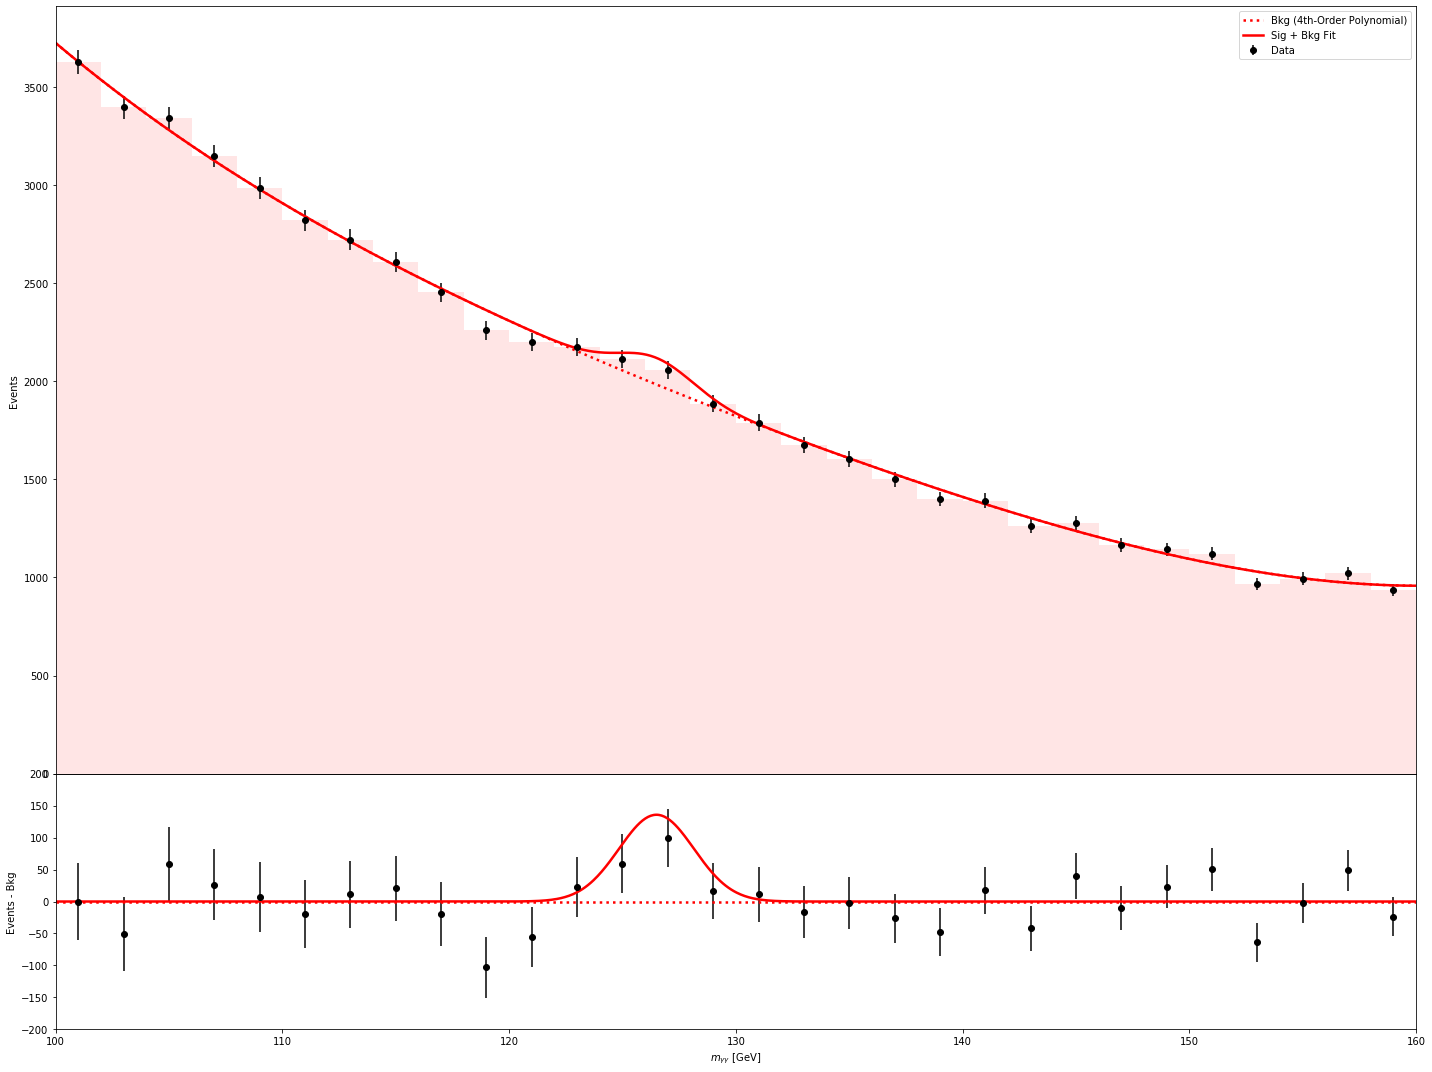

In [5]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = pandas.concat([df11["invariant_mass"], df12["invariant_mass"]])

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nTot, binTot, _ = axesBig.hist(massesTot, color='r', alpha=0.1, bins=30)
xTot = 0.5*(binTot[1:] + binTot[:-1])

errTot = np.zeros(len(nTot))
for i in range(len(n1)):
    valTot = nTot[i]
    errorTot = np.sqrt(valTot)
    if valTot == 0: errorTot = 0
    errTot[i] = errorTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

optTot, covTot = curve_fit(model, xdata=xTot, ydata=nTot, p0=[1822.34263, -2.45389045e-02, 1.88261525e-04, -8.45680089e-07, 1.42080042e-07], sigma=errTot)

argsTot = [1822.34263, -2.45389045e-02, 1.88261525e-04, -8.45680089e-07, 1.42080042e-07, 563.404078]
optTotN, covTotN = curve_fit(modelN, xdata=xTot, ydata=nTot, p0=argsTot, sigma=errTot)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optTot) - model(massRng, *optTot), color='r', linestyle=':', linewidth=2.5)

#axesBig.plot(massRng, modelN(massRng, *optTotN), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
#ax[4, 2].plot(massRng, modelN(massRng, *optTotN) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)
axesBig.plot(massRng, modelN(massRng, *argsTot), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsTot) - model(massRng, *optTot), color='r', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-200, 200)

axesBig.errorbar(xTot, nTot, yerr=errTot, color='k', fmt='o', label='Data')
ax[3].errorbar(xTot, nTot - model(xTot, *optTot), yerr=errTot, color='k', fmt='o')

axesBig.legend()
fig.tight_layout()

plt.show()

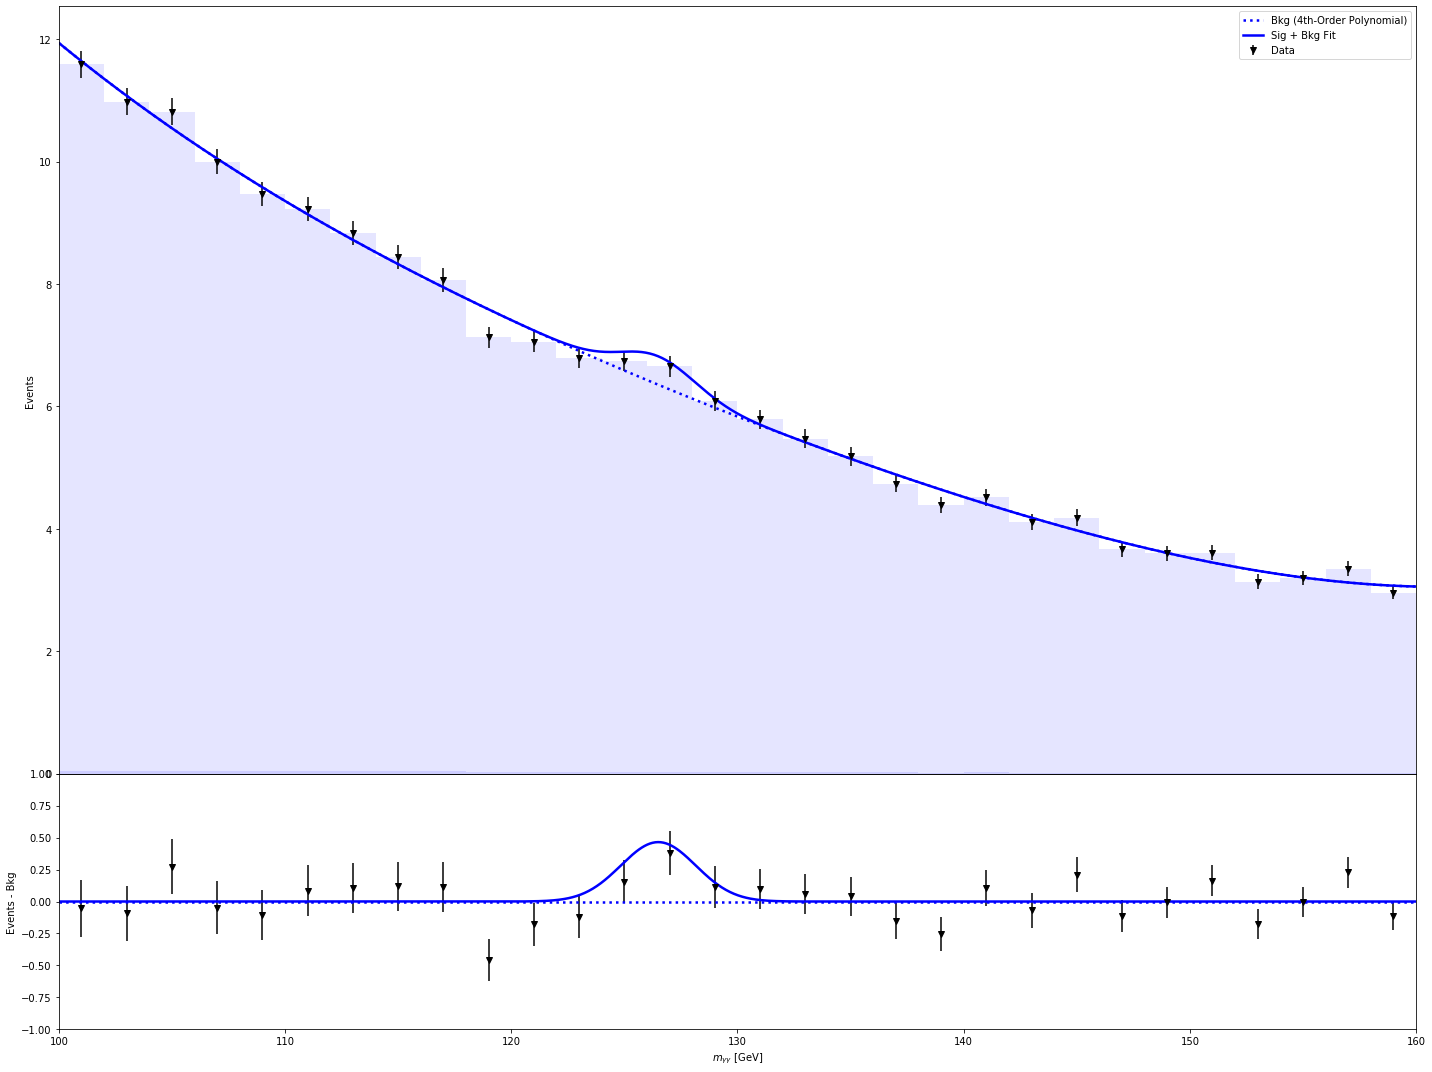

In [24]:
NDTot = [2945+2054, 173+97, 12136+7129, 785+444, 2015+1493, 113+77, 11099+8313, 706+501, 5140+3591, 139+89]   # number of events 7&8 TeV
NSTot = [14.2+10.5, 2.5+1.5, 30.9+21.6, 5.2+2.8, 8.9+6.7, 1.6+1, 26.9+21.2, 4.5+2.7, 12.8+9.5, 3.0+2.2]        # number of signals 7&8 TeV

weights, w = [], []
for i in range(len(NSTot)):
    w.append(np.log(1 + NSTot[i]/NDTot[i]))
    
w1 = w[0]*np.ones(len(cat1))
w2 = w[1]*np.ones(len(cat2))
w3 = w[2]*np.ones(len(cat3))
w4 = w[3]*np.ones(len(cat4))
w5 = w[4]*np.ones(len(cat5))
w6 = w[5]*np.ones(len(cat6))
w7 = w[6]*np.ones(len(cat7))
w8 = w[7]*np.ones(len(cat8))
w9 = w[8]*np.ones(len(cat9))
w10 = w[9]*np.ones(len(cat10))

weights.extend(w1)
weights.extend(w2)
weights.extend(w3)
weights.extend(w4)
weights.extend(w5)
weights.extend(w6)
weights.extend(w7)
weights.extend(w8)
weights.extend(w9)
weights.extend(w10)

FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = pandas.concat([df11["invariant_mass"], df12["invariant_mass"]])

fig, ax = plt.subplots(4, figsize=(20, 15), sharex='col', gridspec_kw={'hspace': 0})

ax[0].remove()
ax[1].remove()
ax[2].remove()

gs = ax[0].get_gridspec()
axesBig = fig.add_subplot(gs[0:3])
nWghtTot0, binWghtTot0, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights))
nWghtTot, binWghtTot, _ = axesBig.hist(massesTot, color='b', alpha=0.1, bins=30, weights=np.array(weights)**2)
xWghtTot = 0.5*(binWghtTot[1:] + binWghtTot[:-1])

errWghtTot = np.zeros(len(nWghtTot))
for i in range(len(nWghtTot)):
    valWghtTot = nWghtTot[i]
    errorWghtTot = np.sqrt(valWghtTot)
    if valWghtTot == 0: errorWghtTot = 1
    errWghtTot[i] = errorWghtTot
    
axesBig.set_ylabel('Events')
ax[3].set_ylabel('Events - Bkg')
ax[3].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')

#optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot, p0=[2.65903069, 9.47351207e+05, 2.22671415e+04, 1.74456066e+02, 4.55591718e-01], sigma=errWghtTot)
optWghtTot, covWghtTot = curve_fit(model, xdata=xWghtTot, ydata=nWghtTot0, sigma=errWghtTot)

argsWghtTot = np.concatenate([optWghtTot, np.array([1.92897799])])

optWghtTotN, covWghtTotN = curve_fit(modelN, xdata=xWghtTot, ydata=nWghtTot0, p0=argsWghtTot, sigma=errWghtTot)

#print(optWghtTotN)

# Summed Weights Distribution and Difference
axesBig.plot(massRng, model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3].plot(massRng, model(massRng, *optWghtTot) - model(massRng, *optWghtTot), color='b', linestyle=':', linewidth=2.5)

axesBig.plot(massRng, modelN(massRng, *argsWghtTot), color='b', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3].plot(massRng, modelN(massRng, *argsWghtTot) - model(massRng, *optWghtTot), color='b', linestyle='-', linewidth=2.5)

axesBig.set_xticks([])
axesBig.set_xlim(100, 160)
ax[3].set_xlim(100, 160)
ax[3].set_ylim(-1, 1)

axesBig.errorbar(xWghtTot, nWghtTot0, yerr=errWghtTot, color='k', fmt='v', label='Data')
ax[3].errorbar(xWghtTot, nWghtTot0 - model(xWghtTot, *optWghtTot), yerr=errWghtTot, color='k', fmt='v')

axesBig.legend()
fig.tight_layout()

plt.show()

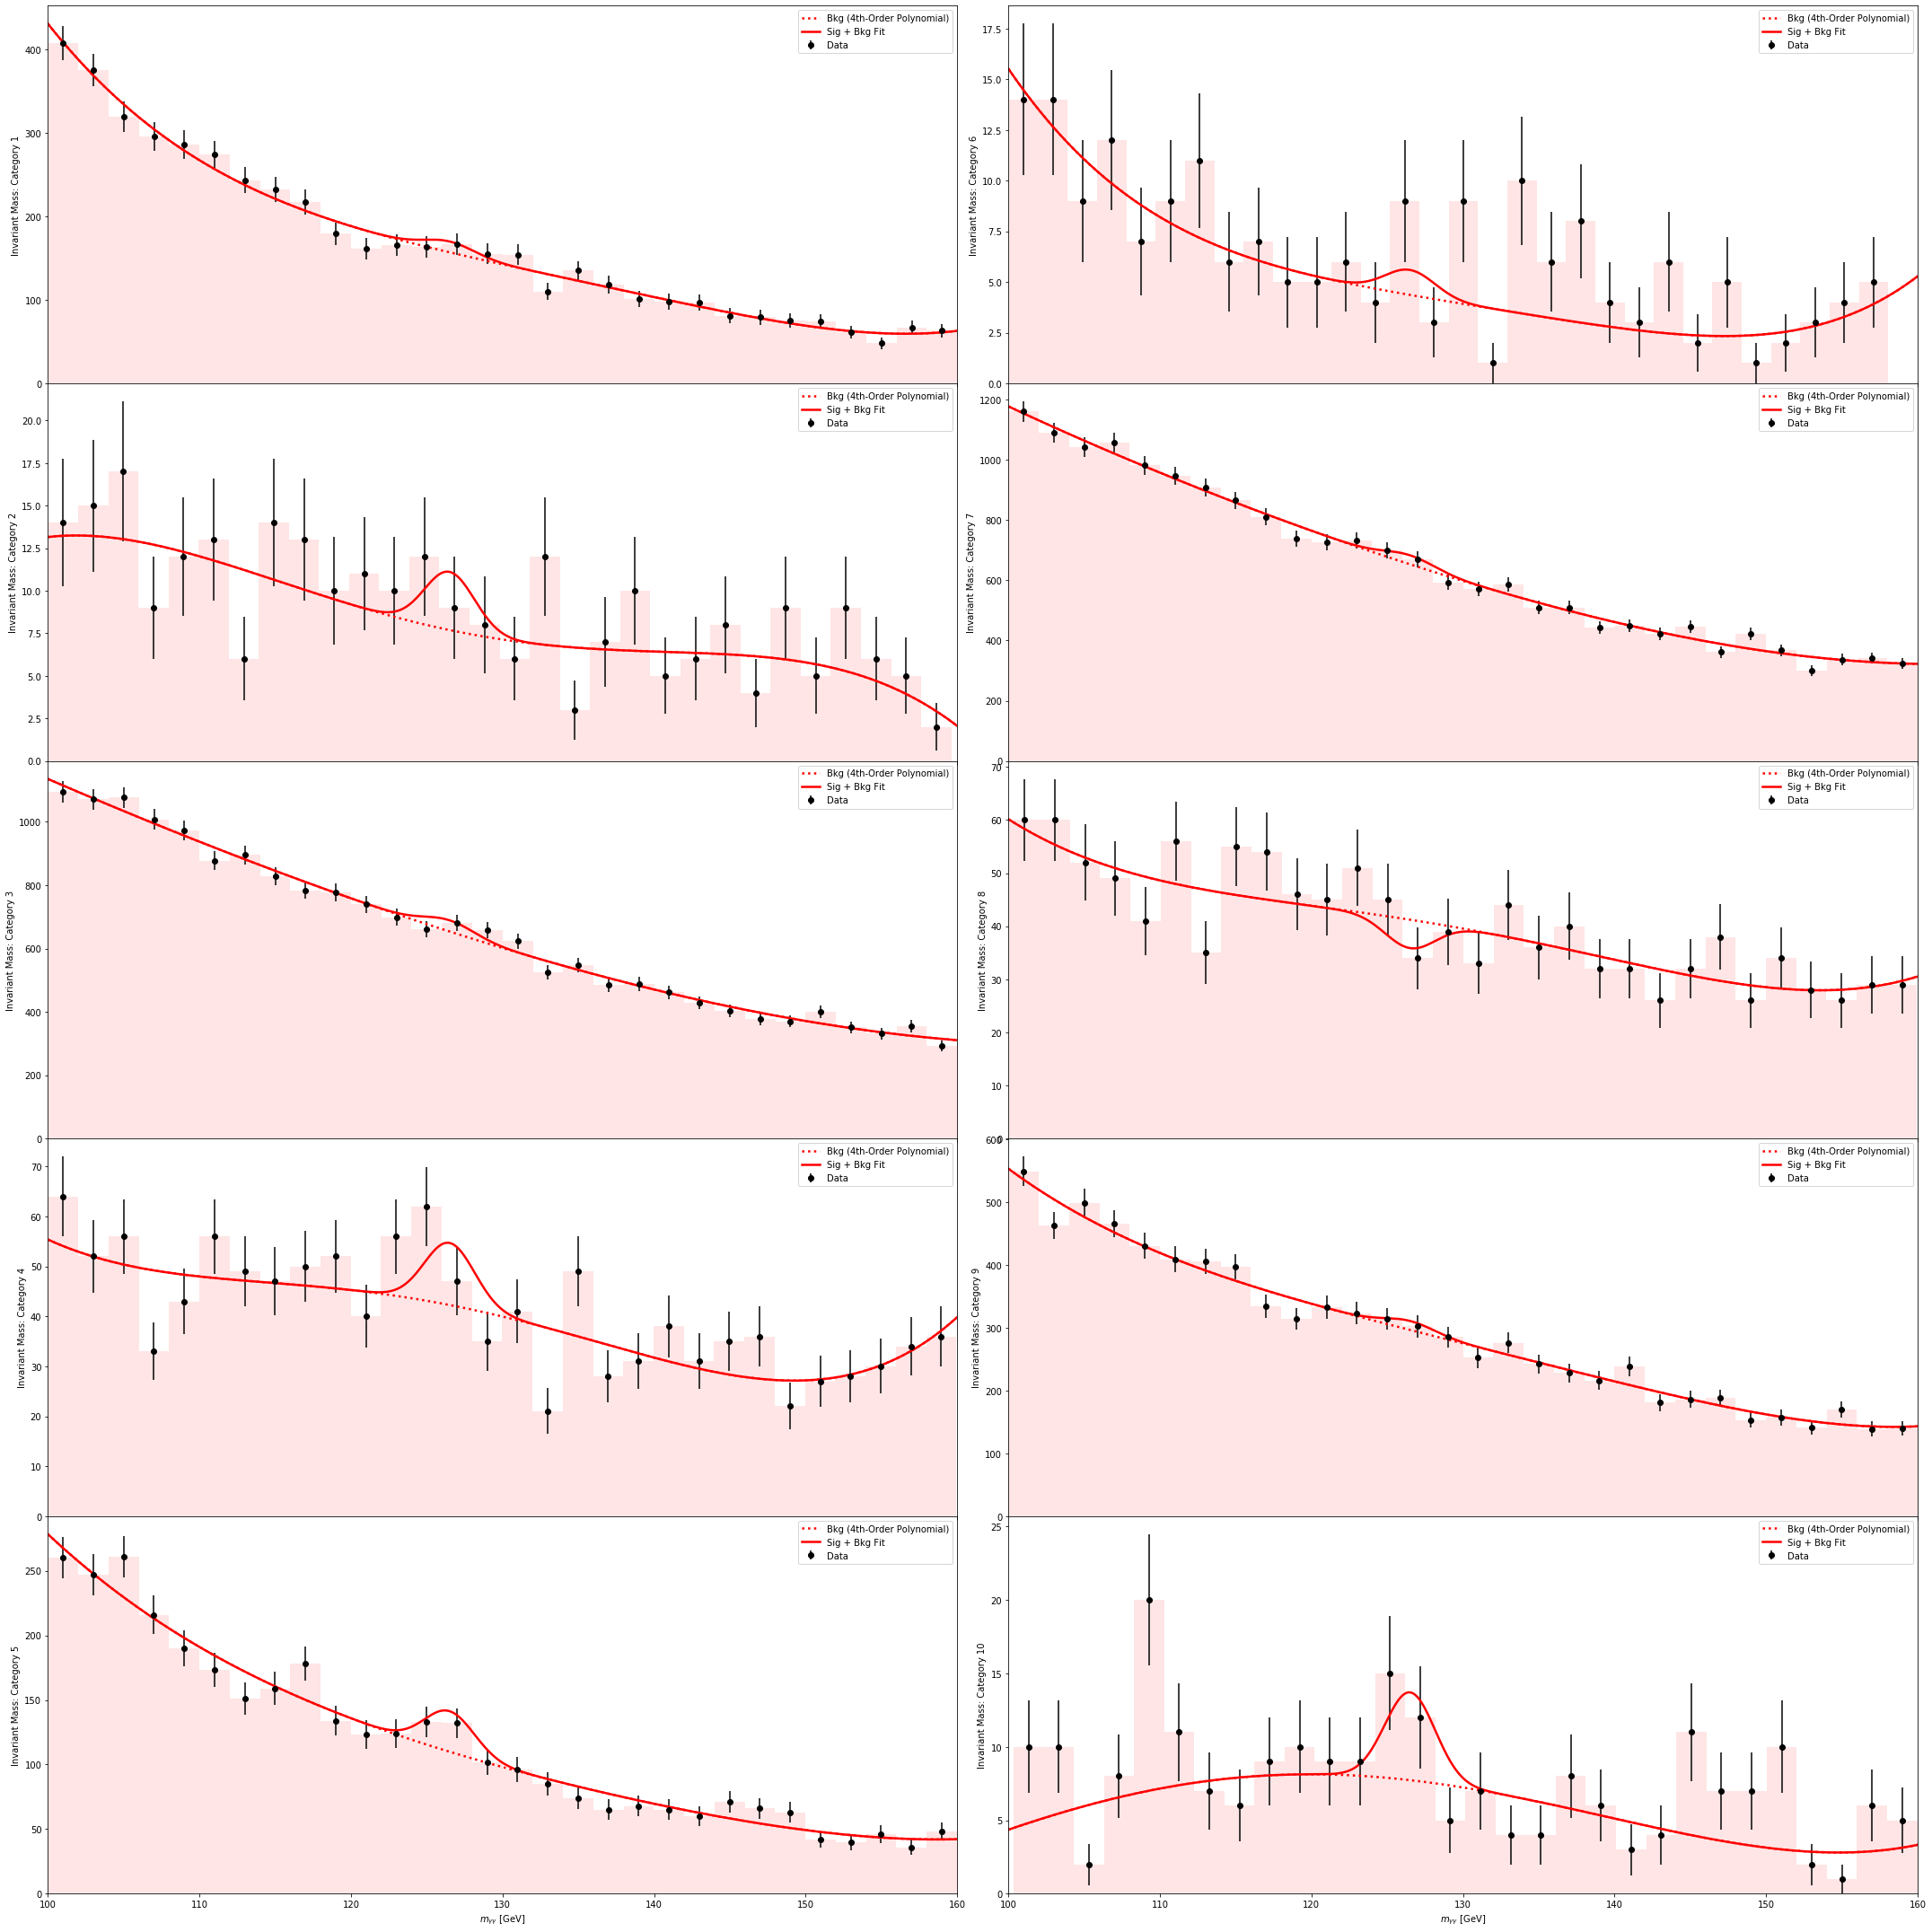

In [33]:
FWHMTot = 3.9
mu, sigmaTot = 126.5, FWHMTot/(2*np.sqrt(2*np.log(2)))
massRng = np.linspace(100, 160, 1000)

massesTot = pandas.concat([df11["invariant_mass"], df12["invariant_mass"]])

fig, ax = plt.subplots(5, 2, figsize=(30, 30), sharex='col', gridspec_kw={'hspace': 0})

n1, bin1, _ = ax[0, 0].hist(cat1, color='r', alpha=0.1, bins=30)
ax[0, 0].set_ylabel('Invariant Mass: Category 1')
ax[0, 0].set_xlim(100, 160)

n2, bin2, _ = ax[1, 0].hist(cat2, color='r', alpha=0.1, bins=30)
ax[1, 0].set_ylabel('Invariant Mass: Category 2')
ax[1, 0].set_xlim(100, 160)

n3, bin3, _ = ax[2, 0].hist(cat3, color='r', alpha=0.1, bins=30)
ax[2, 0].set_ylabel('Invariant Mass: Category 3')
ax[2, 0].set_xlim(100, 160)

n4, bin4, _ = ax[3, 0].hist(cat4, color='r', alpha=0.1, bins=30)
ax[3, 0].set_ylabel('Invariant Mass: Category 4')
ax[3, 0].set_xlim(100, 160)

n5, bin5, _ = ax[4, 0].hist(cat5, color='r', alpha=0.1, bins=30)
ax[4, 0].set_ylabel('Invariant Mass: Category 5')
ax[4, 0].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 0].set_xlim(100, 160)

n6, bin6, _ = ax[0, 1].hist(cat6, color='r', alpha=0.1, bins=30)
ax[0, 1].set_ylabel('Invariant Mass: Category 6')
ax[0, 1].set_xlim(100, 160)

n7, bin7, _ = ax[1, 1].hist(cat7, color='r', alpha=0.1, bins=30)
ax[1, 1].set_ylabel('Invariant Mass: Category 7')
ax[1, 1].set_xlim(100, 160)

n8, bin8, _ = ax[2, 1].hist(cat8, color='r', alpha=0.1, bins=30)
ax[2, 1].set_ylabel('Invariant Mass: Category 8')
ax[2, 1].set_xlim(100, 160)

n9, bin9, _ = ax[3, 1].hist(cat9, color='r', alpha=0.1, bins=30)
ax[3, 1].set_ylabel('Invariant Mass: Category 9')
ax[3, 1].set_xlim(100, 160)

n10, bin10, _ = ax[4, 1].hist(cat10, color='r', alpha=0.1, bins=30)
ax[4, 1].set_ylabel('Invariant Mass: Category 10')
ax[4, 1].set_xlabel(r'$m_{\gamma \gamma}$ [GeV]')
ax[4, 1].set_xlim(100, 160)

# Errors represent error per bin
err1 = np.zeros(len(n1))
err2 = np.zeros(len(n2))
err3 = np.zeros(len(n3))
err4 = np.zeros(len(n4))
err5 = np.zeros(len(n5))
err6 = np.zeros(len(n6))
err7 = np.zeros(len(n7))
err8 = np.zeros(len(n8))
err9 = np.zeros(len(n9))
err10 = np.zeros(len(n10))
for i in range(len(n1)):
    val1, val2, val3, val4, val5, val6, val7, val8, val9, val10 = n1[i], n2[i], n3[i], n4[i], n5[i], n6[i], n7[i], n8[i], n9[i], n10[i]
    error1, error2, error3, error4, error5 = np.sqrt(val1), np.sqrt(val2), np.sqrt(val3), np.sqrt(val4), np.sqrt(val5)
    error6, error7, error8, error9, error10 = np.sqrt(val6), np.sqrt(val7), np.sqrt(val8), np.sqrt(val9), np.sqrt(val10)
    if val1 == 0: error1 = 0
    if val2 == 0: error2 = 0
    if val3 == 0: error3 = 0
    if val4 == 0: error4 = 0
    if val5 == 0: error5 = 0
    if val6 == 0: error6 = 0
    if val7 == 0: error7 = 0
    if val8 == 0: error8 = 0
    if val9 == 0: error9 = 0
    if val10 == 0: error10 = 0
    err1[i], err2[i], err3[i], err4[i], err5[i] = error1, error2, error3, error4, error5
    err6[i], err7[i], err8[i], err9[i], err10[i] = error6, error7, error8, error9, error10

x1 = 0.5*(bin1[1:] + bin1[:-1])
x2 = 0.5*(bin2[1:] + bin2[:-1])
x3 = 0.5*(bin3[1:] + bin3[:-1])
x4 = 0.5*(bin4[1:] + bin4[:-1])
x5 = 0.5*(bin5[1:] + bin5[:-1])
x6 = 0.5*(bin6[1:] + bin6[:-1])
x7 = 0.5*(bin7[1:] + bin7[:-1])
x8 = 0.5*(bin8[1:] + bin8[:-1])
x9 = 0.5*(bin9[1:] + bin9[:-1])
x10 = 0.5*(bin10[1:] + bin10[:-1])

# Background Curves
opt1, cov1 = curve_fit(model, xdata=x1, ydata=n1, p0=[142.429324, -2.81716643e-02, 1.59072467e-04, -1.64871247e-05, 7.26562726e-07], sigma=err1)
opt2, cov2 = curve_fit(model, xdata=x2, ydata=n2, p0=[7.13242062, -1.85726307e-02, 1.05992972e-03, -8.16959780e-06, -1.09589583e-06], sigma=err2)
opt3, cov3 = curve_fit(model, xdata=x3, ydata=n3, p0=[601.538605, -2.40674759e-02, 2.14965697e-04, 1.34998850e-06, 1.04043218e-08], sigma=err3)
opt4, cov4 = curve_fit(model, xdata=x4, ydata=n4, p0=[39.9641519, -1.82351166e-02, -4.37927023e-04, 1.30558776e-05, 7.22833930e-07], sigma=err4)
opt5, cov5 = curve_fit(model, xdata=x5, ydata=n5, p0=[98.0530884, -3.29554513e-02, 4.50176414e-04, -7.97269579e-06, 2.83235689e-07], sigma=err5)
opt6, cov6 = curve_fit(model, xdata=x6, ydata=n6, p0=[3.92109870, -3.14913231e-02, 1.30909557e-04, -1.33552463e-05, 1.89539043e-06], sigma=err6)
opt7, cov7 = curve_fit(model, xdata=x7, ydata=n7, p0=[597.682504, -2.55584896e-02, 2.49626971e-04, 1.90990014e-06, 3.69072892e-08], sigma=err7)
opt8, cov8 = curve_fit(model, xdata=x8, ydata=n8, p0=[39.5555090, -1.29021948e-02, -2.42258511e-04, 4.64567858e-07, 4.49840752e-07], sigma=err8)
opt9, cov9 = curve_fit(model, xdata=x9, ydata=n9, p0=[274.963456, -2.21761309e-02, 1.75076384e-05, -2.97582684e-06, 3.08498289e-07], sigma=err9)
opt10, cov10 = curve_fit(model, xdata=x10, ydata=n10, p0=[7.23083541, -2.31237434e-02, -8.80116946e-04, 2.30539087e-05, 3.99874262e-07], sigma=err10)

ax[0, 0].plot(massRng, model(massRng, *opt1), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 0].plot(massRng, model(massRng, *opt2), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 0].plot(massRng, model(massRng, *opt3), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 0].plot(massRng, model(massRng, *opt4), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 0].plot(massRng, model(massRng, *opt5), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[0, 1].plot(massRng, model(massRng, *opt6), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[1, 1].plot(massRng, model(massRng, *opt7), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[2, 1].plot(massRng, model(massRng, *opt8), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[3, 1].plot(massRng, model(massRng, *opt9), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')
ax[4, 1].plot(massRng, model(massRng, *opt10), color='r', linestyle=':', linewidth=2.5, label='Bkg (4th-Order Polynomial)')

# Signal Curve
args1 = [1.42429324e+02, -2.81716643e-02, 1.59072467e-04, -1.64871247e-05, 7.26562726e-07, 53.8102678]
args2 = [7.13242062, -1.85726307e-02, 1.05992972e-03, -8.16959780e-06, -1.09589583e-06, 14.1858651]
args3 = [601.538605, -2.40674759e-02, 2.14965697e-04, 1.34998850e-06, 1.04043218e-08, 146.700018]
args4 = [39.9641519, -1.82351166e-02, -4.37927023e-04, 1.30558776e-05, 7.22833930e-07, 51.5705980]
args5 = [98.0530884, -3.29554513e-02, 4.50176414e-04, -7.97269579e-06, 2.83235689e-07, 130.271288]
args6 = [3.92109870, -3.14913231e-02, 1.30909557e-04, -1.33552463e-05, 1.89539043e-06, 5.11090543]
args7 = [597.682504, -2.55584896e-02, 2.49626971e-04, 1.90990014e-06, 3.69072892e-08, 124.038428]
args8 = [39.5555090, -1.29021948e-02, -2.42258511e-04, 4.64567858e-07, 4.49840752e-07, -22.2077388]
args9 = [274.963456, -2.21761309e-02, 1.75076384e-05, -2.97582684e-06, 3.08498289e-07, 59.2924973]
args10 = [7.23083541, -2.31237434e-02, -8.80116946e-04, 2.30539087e-05, 3.99874262e-07, 24.7887653]

optN1, covN1 = curve_fit(modelN, xdata=x1, ydata=n1, p0=args1, sigma=err1)
optN2, covN2 = curve_fit(modelN, xdata=x2, ydata=n2, p0=args2, sigma=err2)
optN3, covN3 = curve_fit(modelN, xdata=x3, ydata=n3, p0=args3, sigma=err3)
optN4, covN4 = curve_fit(modelN, xdata=x4, ydata=n4, p0=args4, sigma=err4)
optN5, covN5 = curve_fit(modelN, xdata=x5, ydata=n5, p0=args5, sigma=err5)
optN6, covN6 = curve_fit(modelN, xdata=x6, ydata=n6, p0=args6, sigma=err6)
optN7, covN7 = curve_fit(modelN, xdata=x7, ydata=n7, p0=args7, sigma=err7)
optN8, covN8 = curve_fit(modelN, xdata=x8, ydata=n8, p0=args8, sigma=err8)
optN9, covN9 = curve_fit(modelN, xdata=x9, ydata=n9, p0=args9, sigma=err9)
optN10, covN10 = curve_fit(modelN, xdata=x10, ydata=n10, p0=args10, sigma=err10)

ax[0, 0].plot(massRng, modelN(massRng, *args1), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 0].plot(massRng, modelN(massRng, *args2), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 0].plot(massRng, modelN(massRng, *args3), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 0].plot(massRng, modelN(massRng, *args4), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 0].plot(massRng, modelN(massRng, *args5), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[0, 1].plot(massRng, modelN(massRng, *args6), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[1, 1].plot(massRng, modelN(massRng, *args7), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[2, 1].plot(massRng, modelN(massRng, *args8), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[3, 1].plot(massRng, modelN(massRng, *args9), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')
ax[4, 1].plot(massRng, modelN(massRng, *args10), color='r', linestyle='-', linewidth=2.5, label='Sig + Bkg Fit')

ax[0, 0].errorbar(x1, n1, yerr=err1, color='k', fmt='o', label='Data')
ax[1, 0].errorbar(x2, n2, yerr=err2, color='k', fmt='o', label='Data')
ax[2, 0].errorbar(x3, n3, yerr=err3, color='k', fmt='o', label='Data')
ax[3, 0].errorbar(x4, n4, yerr=err4, color='k', fmt='o', label='Data')
ax[4, 0].errorbar(x5, n5, yerr=err5, color='k', fmt='o', label='Data')
ax[0, 1].errorbar(x6, n6, yerr=err6, color='k', fmt='o', label='Data')
ax[1, 1].errorbar(x7, n7, yerr=err7, color='k', fmt='o', label='Data')
ax[2, 1].errorbar(x8, n8, yerr=err8, color='k', fmt='o', label='Data')
ax[3, 1].errorbar(x9, n9, yerr=err9, color='k', fmt='o', label='Data')
ax[4, 1].errorbar(x10, n10, yerr=err10, color='k', fmt='o', label='Data')

ax[0, 0].legend()
ax[1, 0].legend()
ax[2, 0].legend()
ax[3, 0].legend()
ax[4, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()
ax[2, 1].legend()
ax[3, 1].legend()
ax[4, 1].legend()
fig.tight_layout()

plt.show()